In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## import the library below:

In [2]:
from PyEyeSim import EyeData


In [3]:
%load_ext autoreload
%autoreload 2

## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [4]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [5]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

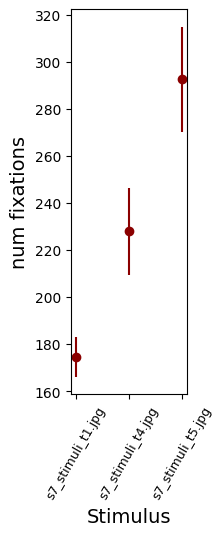

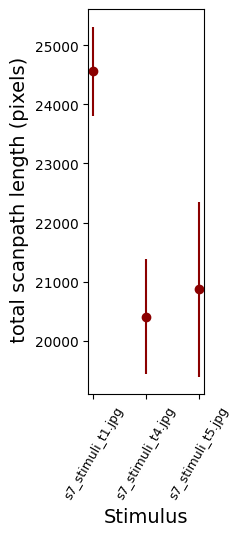

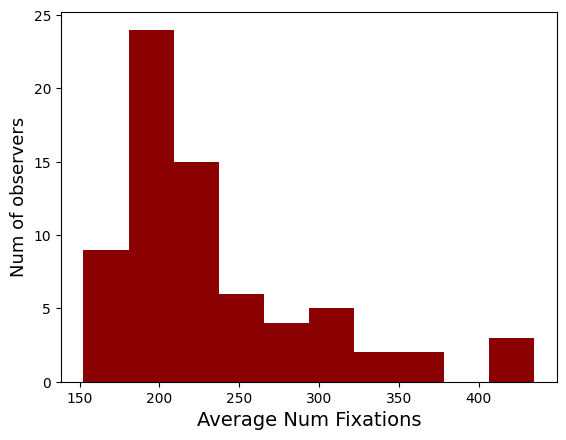

In [6]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='orig_fix_x',mean_y='orig_fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid', StimPath=Path+'images/',StimExt='.jpg')
DyslexiaDat.RunDescriptiveFix(Visual=1)


In [7]:
CondIdx, Cond = DyslexiaDat.GetGroups('class_id')

Conditions [0 1]


In [12]:
Cond

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

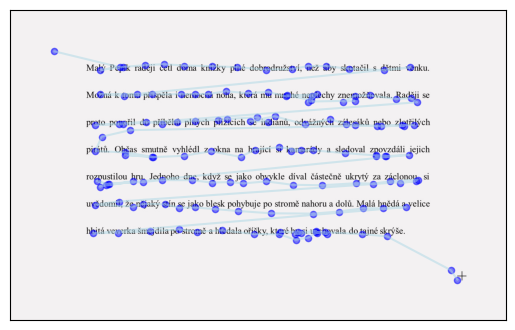

In [ ]:
DyslexiaDat.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=0)

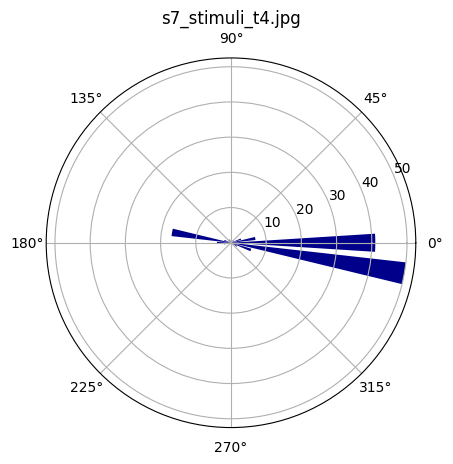

In [ ]:
DyslexiaDat.Vis_Saccade_Angles(DyslexiaDat.stimuli[1], 0, 'darkblue', binsize=10)

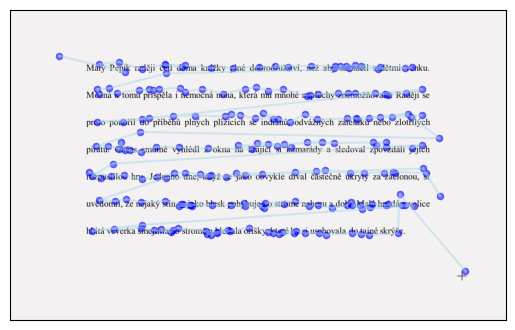

In [ ]:
DyslexiaDat.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=4)

In [ ]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1,InferS=False)

In [78]:
x = 0
for sac in SaccadeObj[0][0]:
    print(sac.Coords())
    print(sac.Angle())
    x += 1

(161.49, 170.94, 338.18499999999995, 171.865)
0.29994120891851794
(338.18499999999995, 171.865, 450.405, 168.055)
358.05548830618443
(450.405, 168.055, 582.0225, 161.01)
356.9360918231723
(582.0225, 161.01, 467.5750000000001, 168.845)
176.08367946109553
(467.5750000000001, 168.845, 586.045, 159.235)
355.3624588605811
(586.045, 159.235, 691.33, 178.13)
10.174294194192603
(691.33, 178.13, 715.46, 160.465)
323.79302764841356
(715.46, 160.465, 835.3, 179.23250000000002)
8.900493169389064
(835.3, 179.23250000000002, 961.77, 174.495)
357.8547331370706
(961.77, 174.495, 1071.745, 161.245)
353.13000769178575
(1071.745, 161.245, 1184.955, 161.995)
0.3795707622265291
(1184.955, 161.995, 1325.8775, 145.775)
353.4342209969237
(1325.8775, 145.775, 385.405, 241.56)
174.18460656250423
(385.405, 241.56, 341.27, 236.795)
186.16202493774378
(341.27, 236.795, 466.21, 220.705)
352.66173540963234
(466.21, 220.705, 581.565, 222.035)
0.6605696362691952
(581.565, 222.035, 705.615, 222.5)
0.21477156540572595
(

In [27]:
DyslexiaDat.saccadeangles[0,0].size

135

In [17]:
DyslexiaDat.saccadeangles.shape

(70, 3)

In [ ]:
Saccades[4,1][0,0].size

202

<BarContainer object of 36 artists>

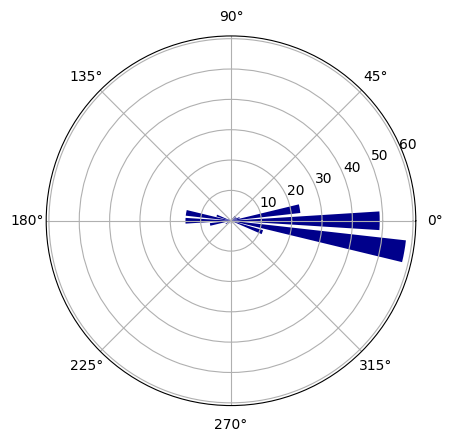

In [ ]:
binss=np.arange(0,360+10,10)
width= np.pi / 25
bincounts, edges=np.histogram(Saccades[4,1][0,0],bins=binss)
ax=plt.subplot(projection='polar')
ax.bar(np.deg2rad(edges[:-1]),bincounts,width=width,bottom=0.0,color='darkblue')

In [235]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=9,InferS=False)

In [ ]:
x = 0
for i in range(0,8):
    for j in range(0,8):
        x += Saccades[0,0][i,j].size
print(x)

292


<BarContainer object of 36 artists>

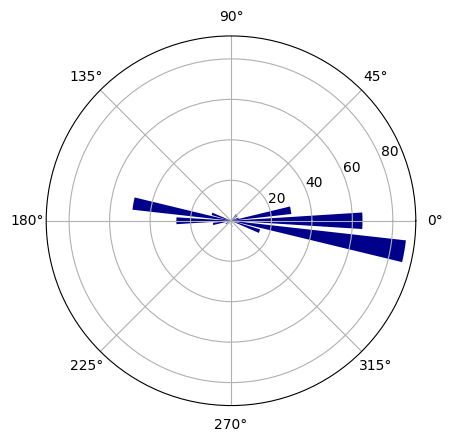

In [75]:
binss=np.arange(0,360+10,10)
width= np.pi / 25
saccade_angles = np.array([])
for i in range(0,8):
    for j in range(0,8):
        saccade_angles = np.append(saccade_angles, Saccades[4,1][i,j])
bincounts, edges=np.histogram(saccade_angles,bins=binss)
ax=plt.subplot(projection='polar')
ax.bar(np.deg2rad(edges[:-1]),bincounts,width=width,bottom=0.0,color='darkblue')

In [15]:
DyslexiaDat.saccadeangles[4,1].size

202

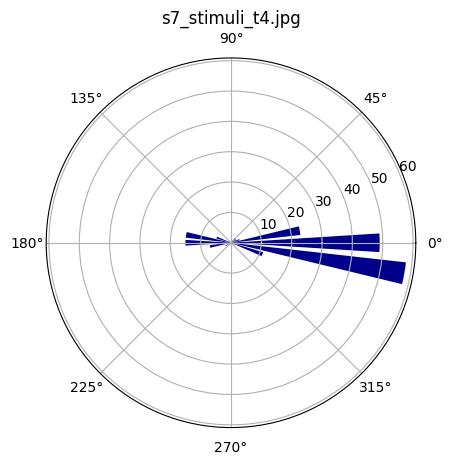

In [ ]:
DyslexiaDat.Vis_Saccade_Angles(DyslexiaDat.stimuli[1], 4, 'darkblue', binsize=10)

In [243]:
Cond

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

In [1]:
from PyEyeSim.scanpathsimhelper import CalcSimAlt, angle_difference_peak180, KuiperStat, angle_difference_power

In [240]:
print(CalcSimAlt(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1], Thr=5))# Non-Dyslexic vs Dyslexic
print(CalcSimAlt(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1], Thr=5))# Non-Dyslexic vs Non-Dyslexic

7058
8456


In [252]:
print(angle_difference_power(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1]))
print(angle_difference_power(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1]))

0.15363203265188063
0.12930800020392533


In [ ]:
print(angle_difference_peak180(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1]))
print(angle_difference_peak180(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1]))

0.4821339474384762
0.4795234990991283


In [238]:
print(angle_difference_peak180(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1], match=True))
print(angle_difference_peak180(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1], match=True))

0.6326358271155005
0.628010982363088


In [ ]:
print(KuiperStat(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[4,1]))
print(KuiperStat(DyslexiaDat.saccadeangles[0,1], DyslexiaDat.saccadeangles[3,1]))

0.8285714285714286
0.8755332902391727


In [314]:
s1 = np.array([0,180])
s2 = np.array([0,180])
print(f'First saccade angles: {s1}, Second saccade angles: {s2}')
print('Original Similarity Metric (+1 if angles are lass or equal than threshold):')
print(CalcSimAlt(s1, s2, Thr=5))
print('Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_power(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1, match=True))
print('Kuiper Statistic (1.0 = completely similar | 0.0 = completely dissimilar)')
print(KuiperStat(s1, s2))

First saccade angles: [  0 180], Second saccade angles: [  0 180]
Original Similarity Metric (+1 if angles are lass or equal than threshold):
2
Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.0
Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.5
Kuiper Statistic (1.0 = completely similar | 0.0 = completely dissimilar)
1.0


In [315]:
s1 = np.array([0,90])
s2 = np.array([2,85])
print(f'First saccade angles: {s1}, Second saccade angles: {s2}')
print('Original Similarity Metric (+1 if angles are lass or equal than threshold):')
print(CalcSimAlt(s1, s2, Thr=5))
print('Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_power(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1, match=True))
print('Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)')
print(KuiperStat(s1, s2))

First saccade angles: [ 0 90], Second saccade angles: [ 2 85]
Original Similarity Metric (+1 if angles are lass or equal than threshold):
1
Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.5
Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.25
Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)
0.0


In [85]:
# generate random data normal distributed with values greater than 0 and less or equal than 360
np.random.seed(0)
s1 = np.abs(np.random.randn(100)) * 360 % 360
np.random.seed(1)
s2 = np.abs(np.random.randn(100)) * 360 % 360

In [84]:
# show size
print(f'Size of s1: {s1.size}')
print(f'Size of s2: {s2.size}')
# Find the intersection
intersection = np.intersect1d(s1, s2)

# Count the number of elements in the intersection
count = len(intersection)

print(f'Number of value inside s1 that are also in s2: {count}')

Size of s1: 100
Size of s2: 100
Number of value inside s1 that are also in s2: 0


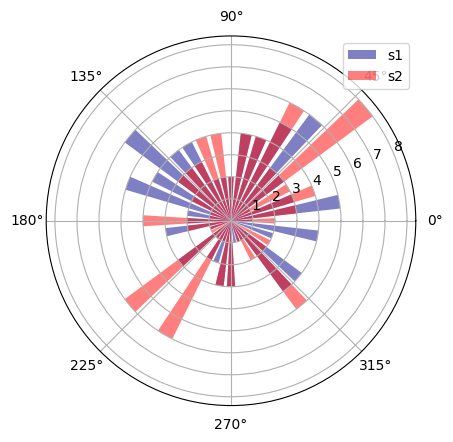

In [349]:
binss = np.arange(0, 360 + 10, 10)
width = np.pi / 25
saccade_angles = np.array([])

# Histogram for s1
bincounts_s1, edges_s1 = np.histogram(s1, bins=binss)
ax = plt.subplot(projection='polar')
ax.bar(np.deg2rad(edges_s1[:-1]), bincounts_s1, width=width, bottom=0.0, color='darkblue', alpha=0.5, label='s1')

# Histogram for s2
bincounts_s2, edges_s2 = np.histogram(s2, bins=binss)
ax.bar(np.deg2rad(edges_s2[:-1]), bincounts_s2, width=width, bottom=0.0, color='red', alpha=0.5, label='s2')

ax.legend()
plt.show()

In [86]:
print('Original Similarity Metric (+1 if angles are lass or equal than threshold):')
print(CalcSimAlt(s1, s2, Thr=5))
print('Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_power(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1))
print('Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):')
print(angle_difference_peak180(s1, s2, power=1, match=True))
print('Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)')
print(KuiperStat(s1, s2))

Original Similarity Metric (+1 if angles are lass or equal than threshold):
558
Angle Difference Metric [Peak at 90°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.5020127312590921
Angle Difference Metric [Peak at 180°] (1.0 = completely dissimilar | 0.0 = completely similar):
0.3213748702290373
Angle Difference Metric [Peak at 180° | No pairwise] (1.0 = completely dissimilar | 0.0 = completely similar):
0.6503216177800245
Kuiper Statistic (1.0 = | 0.0 = completely dissimilar)
0.7899999999999999


In [3]:
# create an array with the same values all 90
s3 = np.full(100, 90)
s4 = np.full(100, 90)

print(CalcSimAlt(s3, s4, Thr=5))

10000


In [278]:
def correctSub2Sub(Matrix):
    """
    Remove all the value equal to -np.inf and retrun the corrected matrix and a list of value that are not removed (position)
    """
    position = set()
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            if Matrix[i,j] != -np.inf:
                position.add(i)

    CorrectMatrix = np.zeros((len(position),len(position)))
    position = list(position)
    for i in range(len(position)):
        for j in range(len(position)):
            CorrectMatrix[i,j] = Matrix[position[i],position[j]]

    return CorrectMatrix, position

In [279]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1,InferS=False)

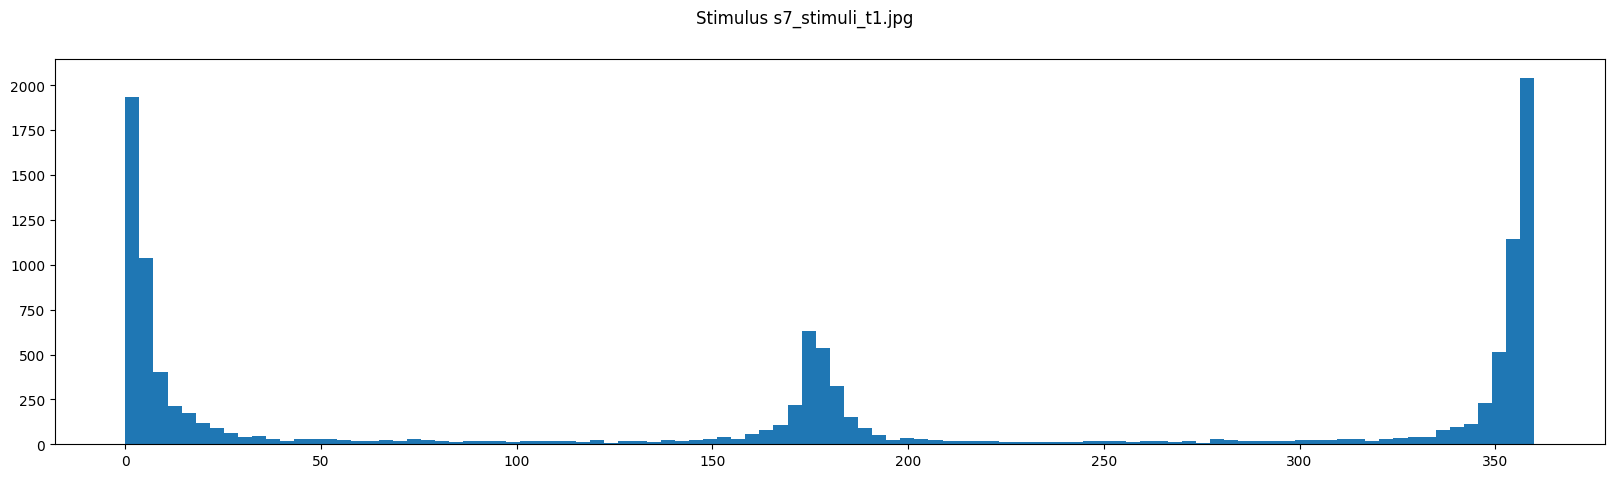

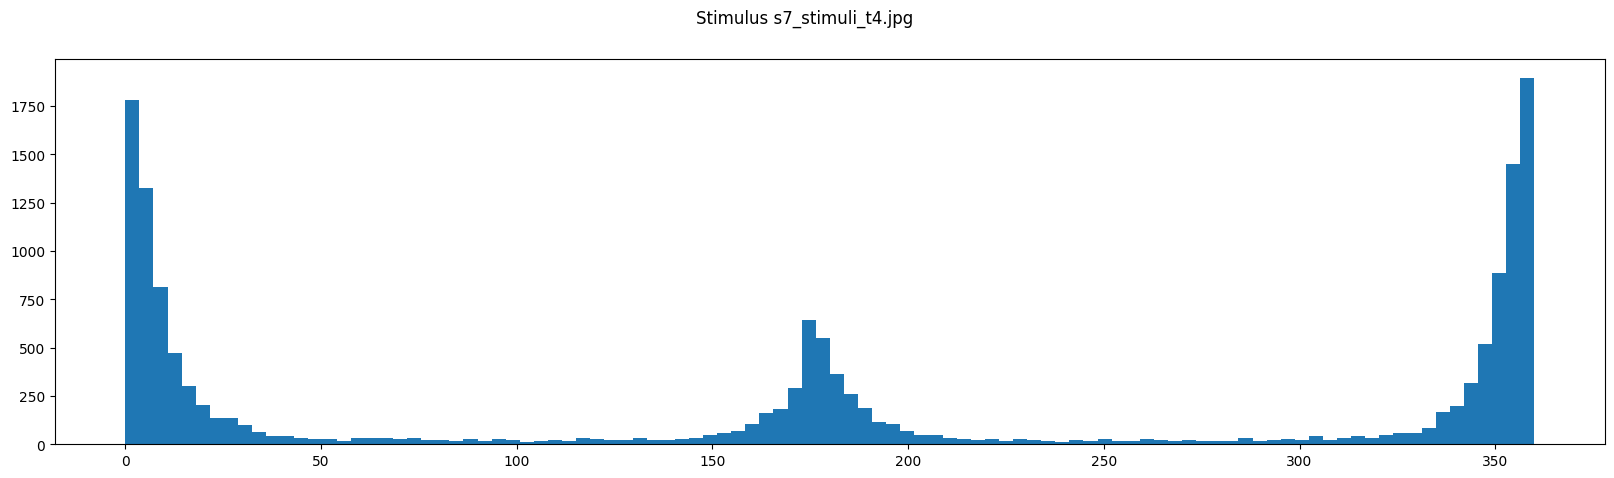

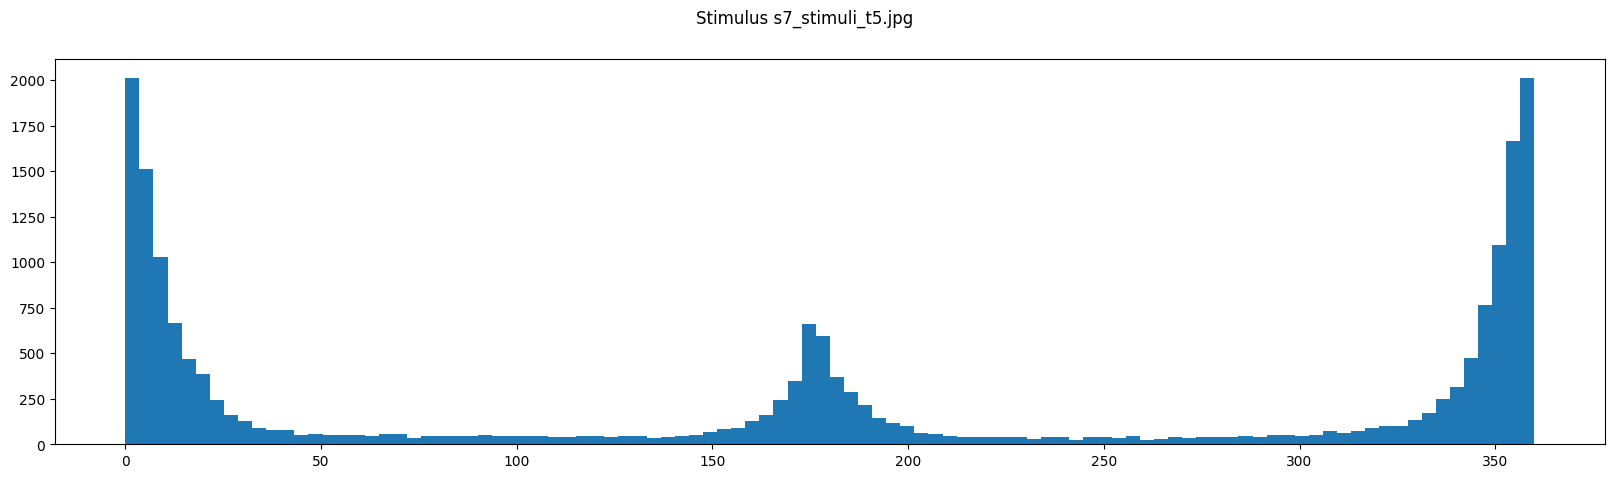

In [ ]:
for i,stim in enumerate(DyslexiaDat.stimuli):
    stim_saccades = Saccades[:,i,:,:]

    stim_saccades = np.array(stim_saccades)
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))
    fig.suptitle(f'Stimulus {stim}')

    angles = []
    for subj in stim_saccades:
        for h in range(subj.shape[0]):
            for v in range(subj.shape[1]):
                for val in subj[h,v]:
                    angles.append(val)
    ax.hist(angles, bins=100)

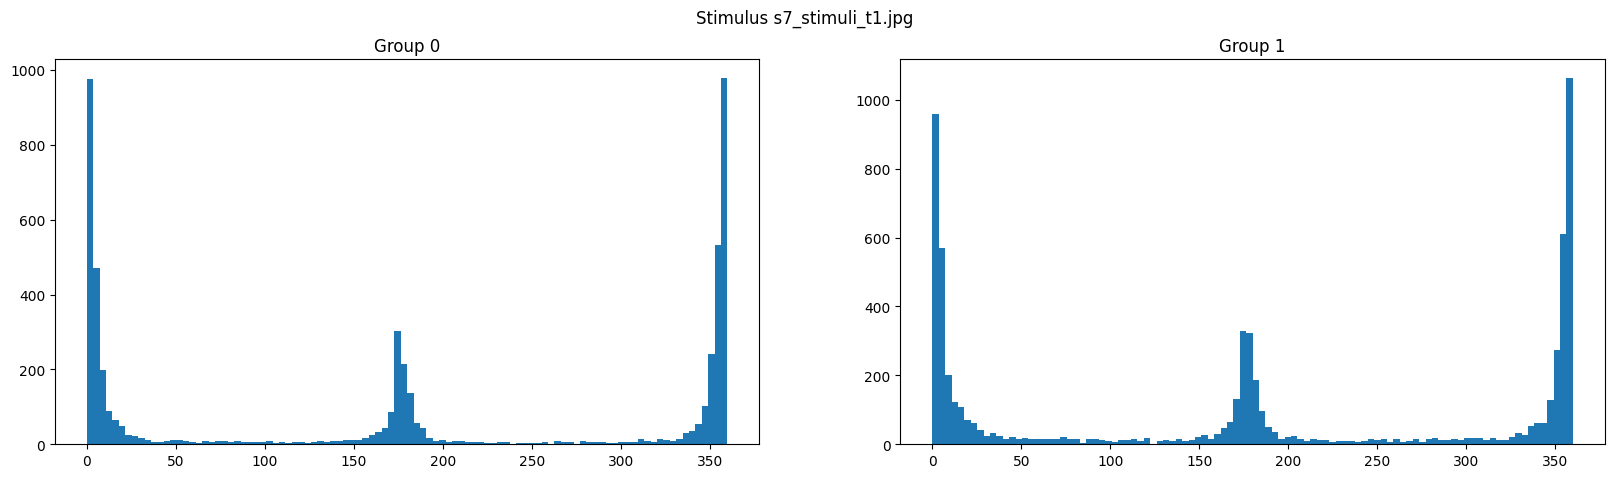

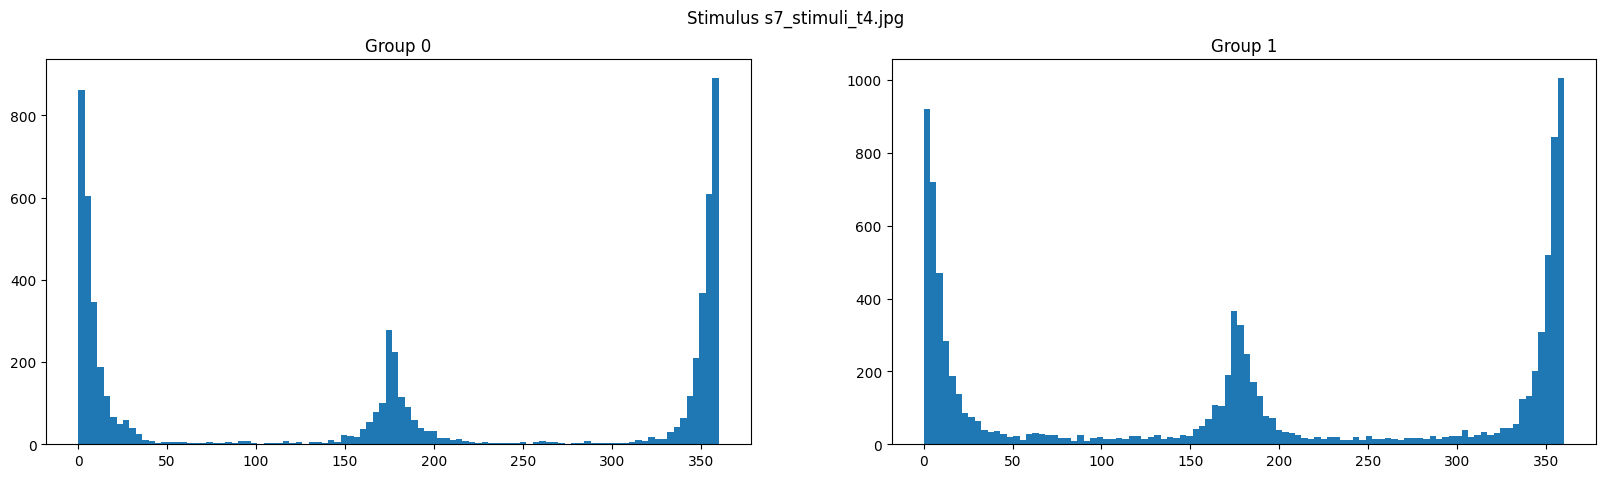

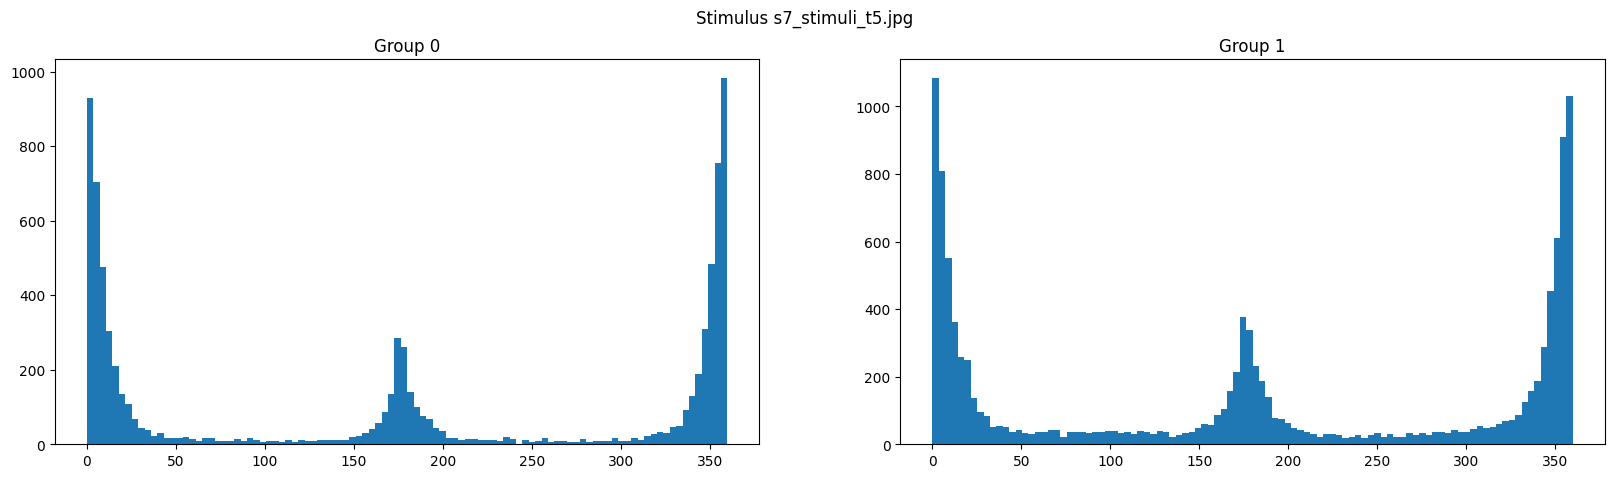

In [ ]:
for i,stim in enumerate(DyslexiaDat.stimuli):
    # for every group of subjects show an istogram with the distribution of the saccades angles
    groups = np.unique(Cond)
    group_saccades = []
    for group in groups:
        # from Saccades[subject, :,:] get only the subjects that are in the group
        group_saccades.append(Saccades[Cond==group,i,:,:])

    group_saccades = np.array(group_saccades)
    fig, ax = plt.subplots(1, len(groups), figsize=(20, 5))
    fig.suptitle(f'Stimulus {stim}')

    for j, group in enumerate(group_saccades):
        angles = []
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h,v]:
                        angles.append(val)
        ax[j].hist(angles, bins=100)
        ax[j].set_title(f'Group {j}')

In [59]:
def split_subjects(matrix, group_list):
    # get unique groups
    groups = np.unique(group_list)
    # create the new matrix
    M = []
    list_subj = []
    for group in groups:
        idx = np.where(group_list == group)[0]
        M.append(matrix[idx][:, idx])
        list_subj.append(idx)
    return M, list_subj

In [61]:
def matrix_subject_reorder(matrix, list_subj):
    M = np.zeros_like(matrix)
    for i, idx1 in enumerate(list_subj):
        for j, idx2 in enumerate(list_subj):
            M[i, j] = matrix[idx1, idx2]
    return M

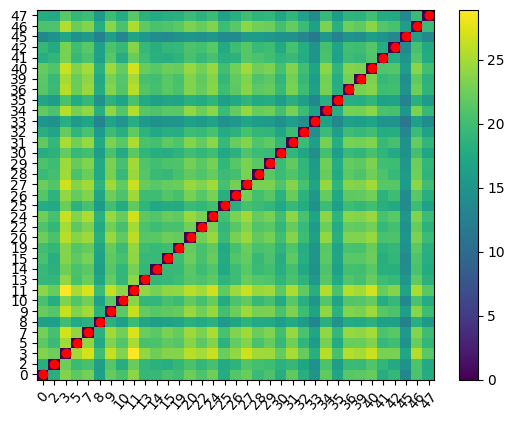

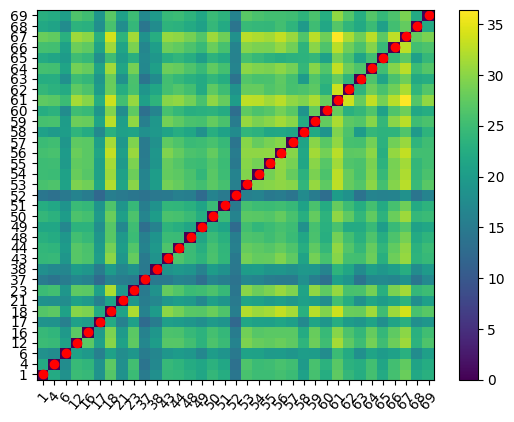

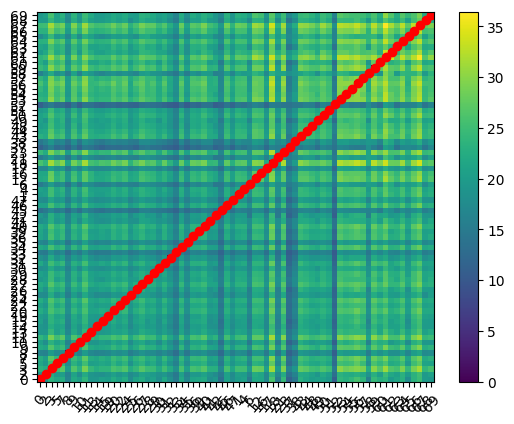

In [284]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False)
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

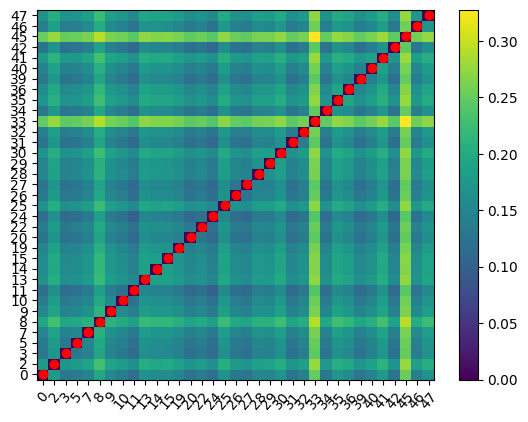

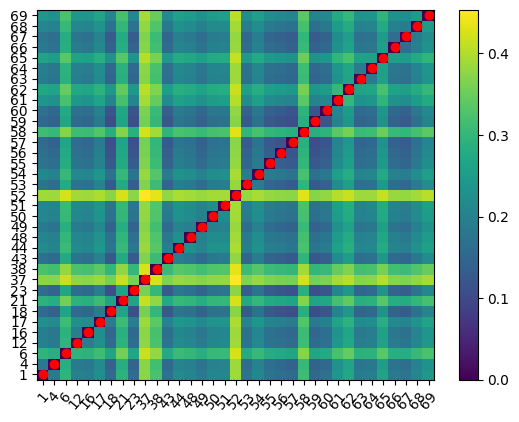

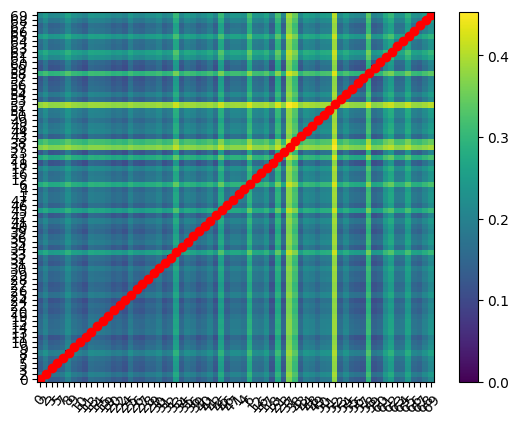

In [ ]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False,method='power')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

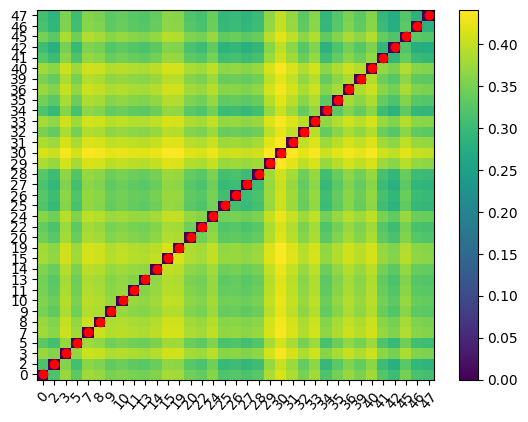

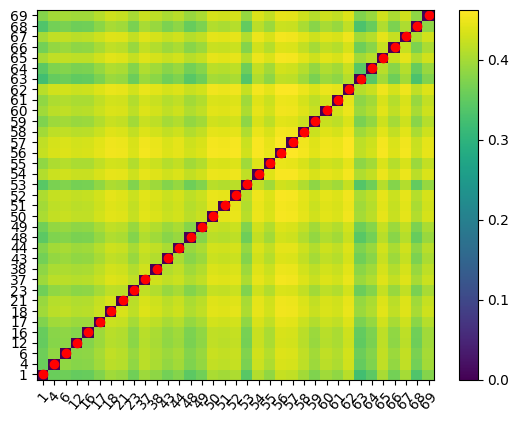

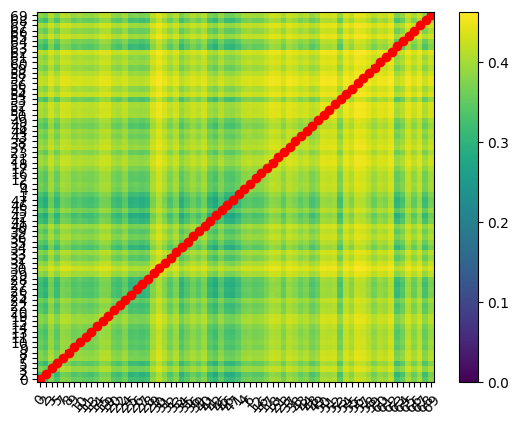

In [ ]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False,method='peak180')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

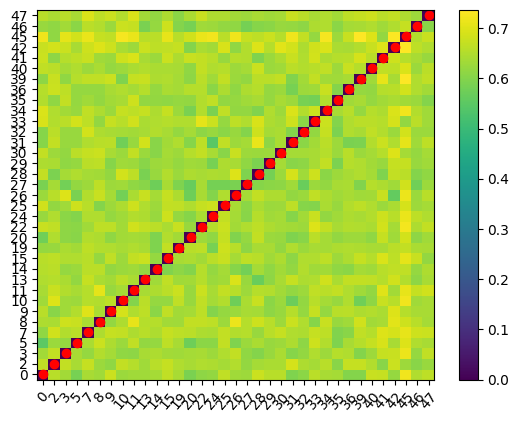

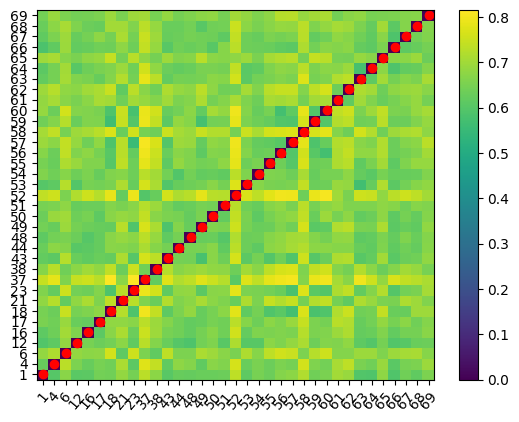

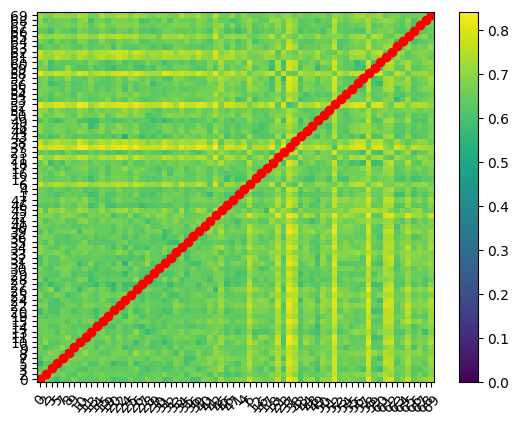

In [62]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False,method='peak180', match=True)
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

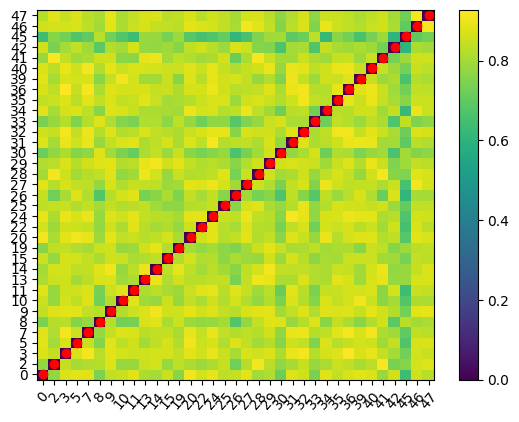

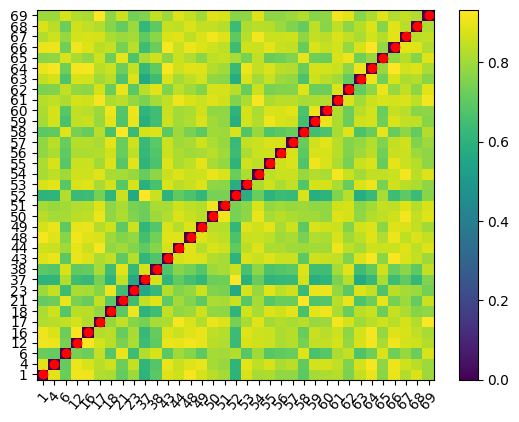

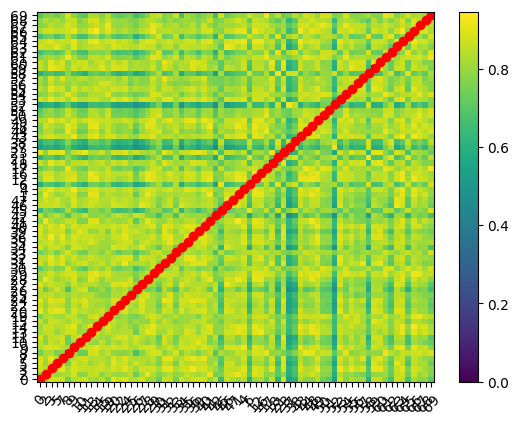

In [64]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=1, inferS=False,method='Kuiper')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

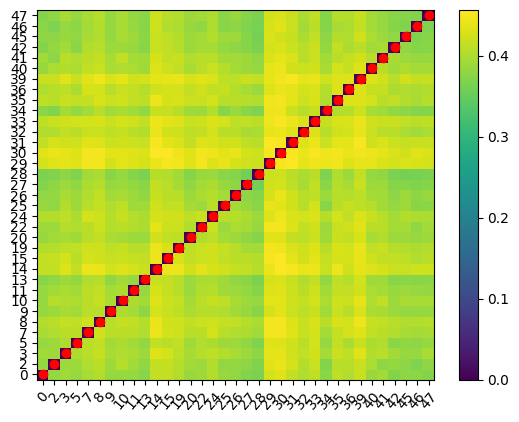

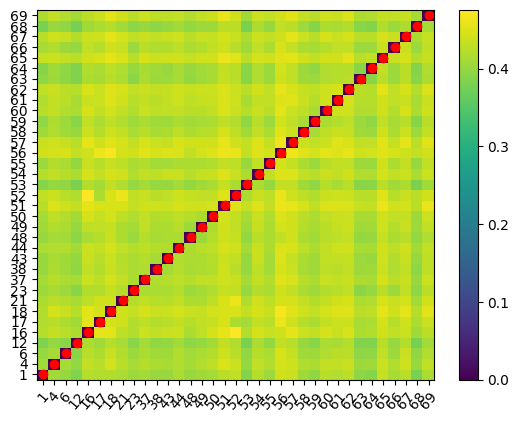

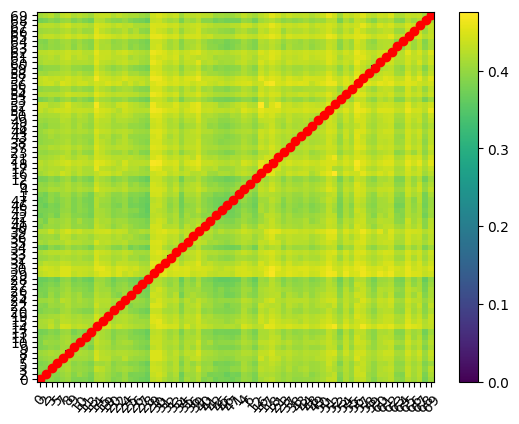

In [65]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False,method='peak180')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

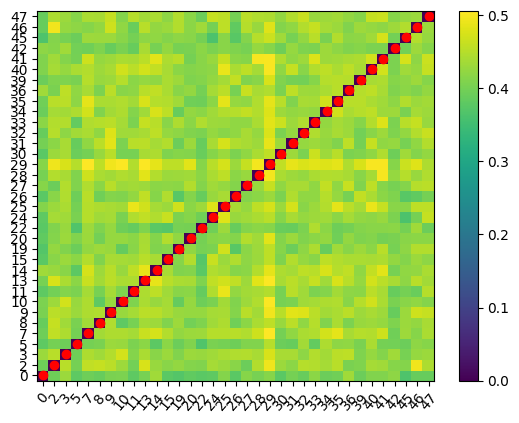

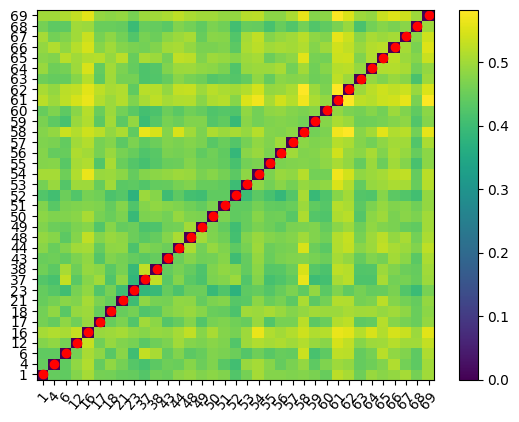

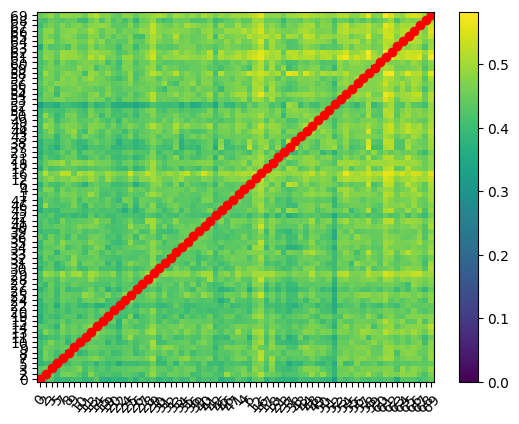

In [66]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False,method='Kuiper')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[1]), negative=True)
ls = list(list_subj[0]) + list(list_subj[1])
S = matrix_subject_reorder(SimVals, ls) 
DyslexiaDat.VisSimmat(S, stimuli=ls, negative=True)

---

Conditions [0 1]


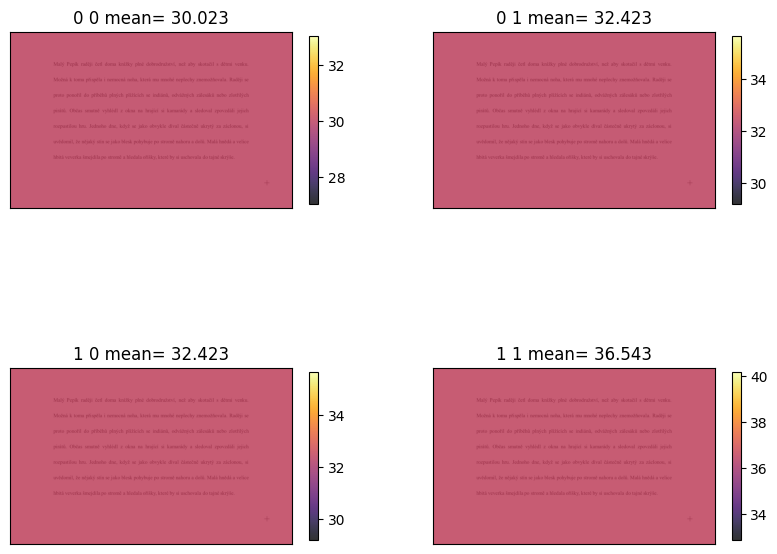

In [ ]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, Thr=10, inferS=False)

Conditions [0 1]


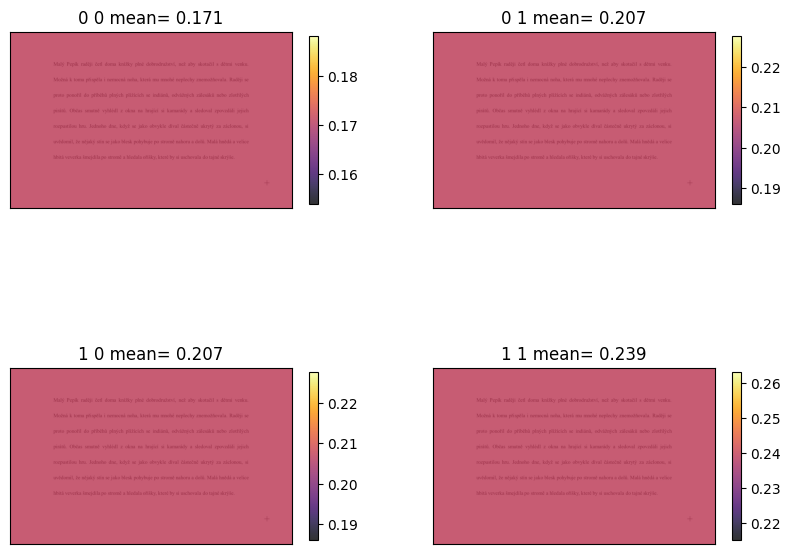

In [ ]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='power')

Conditions [0 1]


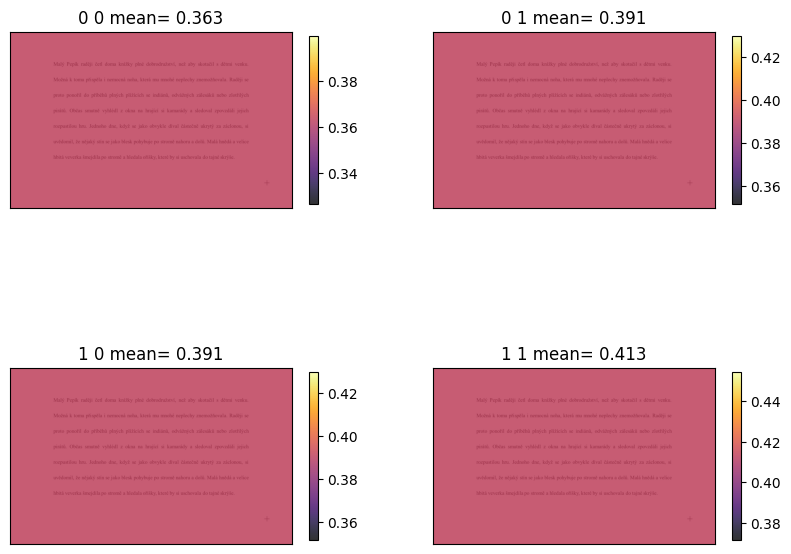

In [ ]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='peak180')

Conditions [0 1]


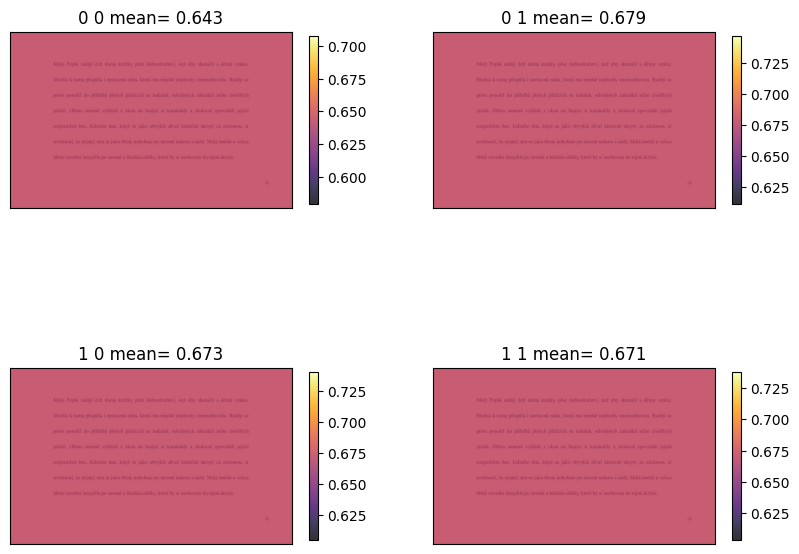

In [109]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='peak180', match=True)

Conditions [0 1]


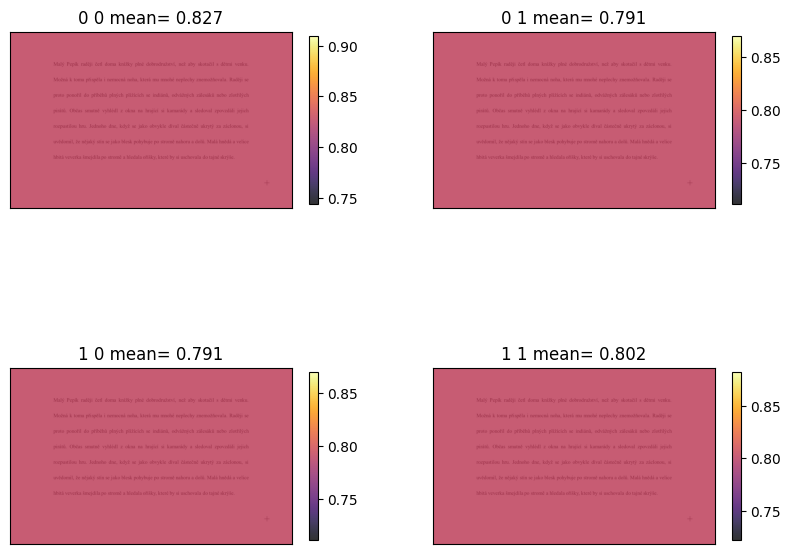

In [110]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=1, inferS=False, method='Kuiper')

Conditions [0 1]


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:384: RuntimeWarning: Mean of empty slice
  ax[cgr1,cgr2].set_title(str(gr1)+' '+str(gr2)+' mean= '+str(np.round(SimVals[cgr1,cgr2],3)))


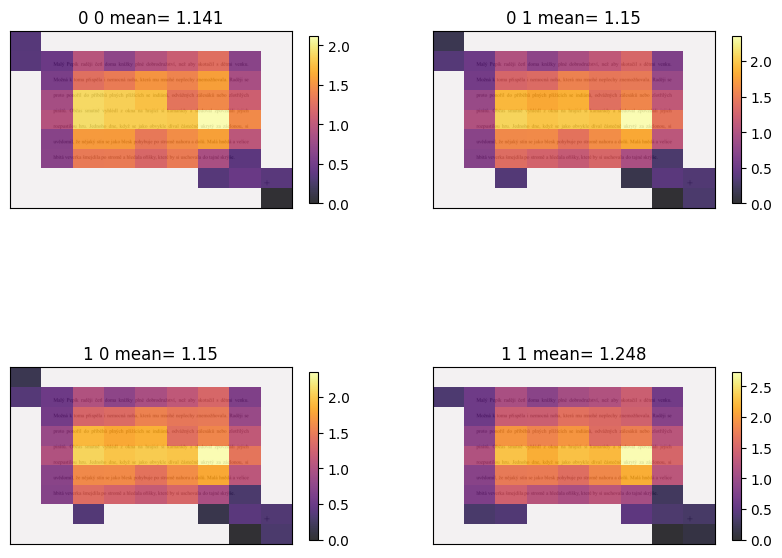

In [113]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, normalize='add', Thr=10)

Conditions [0 1]


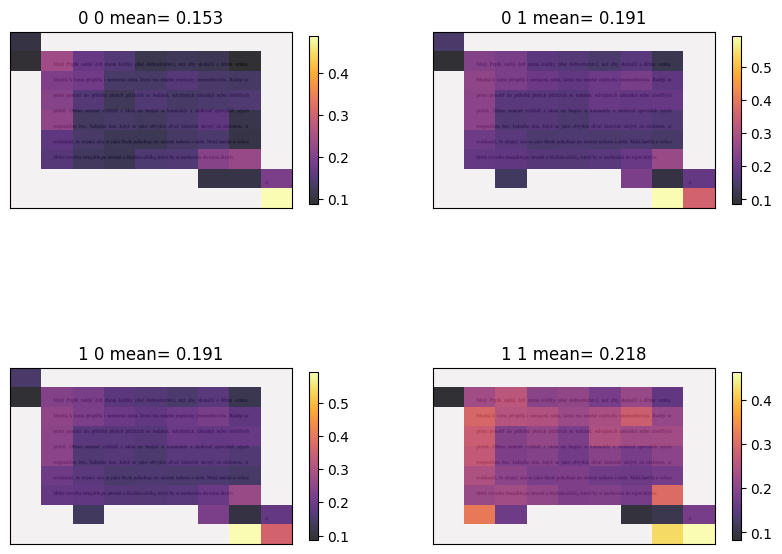

In [114]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, method='power')

Conditions [0 1]


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:384: RuntimeWarning: Mean of empty slice
  ax[cgr1,cgr2].set_title(str(gr1)+' '+str(gr2)+' mean= '+str(np.round(SimVals[cgr1,cgr2],3)))


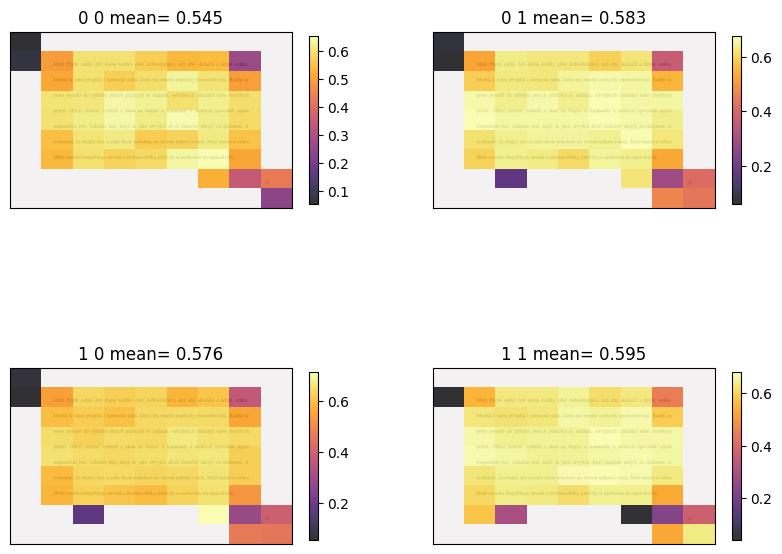

In [111]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, method='peak180', match=True)

Conditions [0 1]


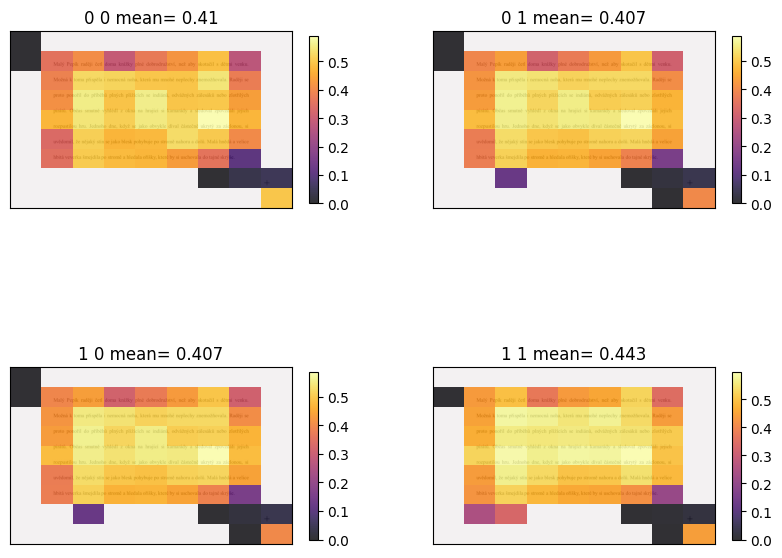

In [112]:
stimn = 1
SimVals,SimValsSD=DyslexiaDat.ScanpathSim2Groups(DyslexiaDat.stimuli[stimn],'class_id', nHor=9, inferS=False, method='Kuiper')

---

## Classification

---

Since we have a pipline that calculates for every subject the similarity with one specifci group, by checking the mean of the group, we can use this metric to classify the subjects in the groups.

So for every subject we will have two values, one for each group, and we will check which one has the highest similarity value.

for example (lower value = more similar)
Subject 0: Group 0: 0.2, Group 1: 0.5 -> Subject 0 is more similar to Group 0 if the true label is 0 we have a correct classification

In [142]:
_,WhichCN=DyslexiaDat.GetGroups('class_id')
WhichCN

Conditions [0 1]


array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

In [11]:
def sim_classification(SimVals,list_subj,betwcond, summary=False, verbose=False, check='min'):
    _,WhichCN=DyslexiaDat.GetGroups(betwcond)
    correct = 0
    false_positives = 0
    false_negatives = 0
    for subj_idx, subj in enumerate(list_subj):
        if not summary and verbose:
            print(f'Subject {subj} is in group {WhichCN[subj]}')
        means = []
        for group in np.unique(WhichCN):
            means.append(np.mean(SimVals[subj_idx][group]))

        flag = False
        if check == 'min':
            if np.argmin(means) == WhichCN[subj]:
                flag = True
        elif check == 'max':
            if np.argmax(means) == WhichCN[subj]:
                flag = True

        if flag:
            correct += 1
            if not summary and verbose:
                print('Correctly classified')
        else:
            if not summary and verbose:
                print(f'Incorrectly classified as group {np.argmin(means)}')
            if np.argmin(means) == 0:
                false_negatives += 1
            else:
                false_positives += 1
        if not summary and verbose:
            print('')
    if summary and verbose:
        # print percentage of correct classifications
        print(f'Correctly classified: {correct/len(list_subj)*100}%')
        print(f'False negatives: {false_negatives/len(list_subj)*100}%')
        print(f'False positives: {false_positives/len(list_subj)*100}%')
    accuracy = correct/len(list_subj)*100
    if not verbose:
        return accuracy

In [363]:
# select n random subjects
n = 5
subj = np.random.choice(DyslexiaDat.ns, n)
subj

array([33,  2, 48, 54, 32])

In [64]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, Thr=10, normalize='add')

Conditions [0 1]


In [ ]:
sim_classification(SimVals,list(subj),'class_id')

Conditions [0 1]


40.0

In [75]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='power')

Conditions [0 1]


In [76]:
sim_classification(SimVals,list(subj),'class_id')

Conditions [0 1]
Subject 44 is in group 1
Incorrectly classified as group 0

Subject 35 is in group 0
Correctly classified

Subject 65 is in group 1
Incorrectly classified as group 0

Subject 50 is in group 1
Incorrectly classified as group 0

Subject 29 is in group 0
Correctly classified



In [77]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180')

Conditions [0 1]


In [78]:
sim_classification(SimVals,list(subj),'class_id')

Conditions [0 1]
Subject 44 is in group 1
Correctly classified

Subject 35 is in group 0
Correctly classified

Subject 65 is in group 1
Correctly classified

Subject 50 is in group 1
Incorrectly classified as group 0

Subject 29 is in group 0
Correctly classified



In [12]:
subj = range(DyslexiaDat.ns)

In [16]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, Thr=10, normalize='add')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True, check='max')  

Conditions [0 1]
Conditions [0 1]
Correctly classified: 50.0%
False negatives: 50.0%
False positives: 0.0%


In [ ]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='power')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 50.0%
False negatives: 50.0%
False positives: 0.0%


In [ ]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='peak180')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 50.0%
False negatives: 50.0%
False positives: 0.0%


In [20]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='peak180', match=True)
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 72.85714285714285%
False negatives: 27.142857142857142%
False positives: 0.0%


In [24]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='Kuiper')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True, check='max') 

Conditions [0 1]
Conditions [0 1]
Correctly classified: 64.28571428571429%
False negatives: 8.571428571428571%
False positives: 27.142857142857142%


In [25]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, Thr=10, normalize='add')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True, check='max')

Conditions [0 1]
Conditions [0 1]
Correctly classified: 50.0%
False negatives: 50.0%
False positives: 0.0%


In [26]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 50.0%
False negatives: 50.0%
False positives: 0.0%


In [ ]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='peak180', match=True)
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True)

Conditions [0 1]
Conditions [0 1]
Correctly classified: 62.857142857142854%
False negatives: 37.142857142857146%
False positives: 0.0%


In [ ]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=9, inferS=False, method='Kuiper')
sim_classification(SimVals,list(subj),'class_id', summary=True, verbose=True, check='max')

Conditions [0 1]
Conditions [0 1]
Correctly classified: 51.42857142857142%
False negatives: 48.57142857142857%
False positives: 0.0%


---

One problem related to the previous method for the classification is that dyslexic subject can result higly different not only from the helthy control but also from each other.

Lets assume that if a subject is very dissimilar from both the groups than is a dyslexic subject.

If this is the case and the original label is 1 (Dyslexic) then we can say that the algorithm is able to correctly classify the subject.

In [159]:
def sim_classification_thr(SimVals,list_subj,WhichCN, thr=[], summary=False, verbose=False, debug=False, check='min', diff='min'):
    correct = 0
    false_positives = 0
    false_negatives = 0
    for subj_idx, subj in enumerate(list_subj):
        if not summary and verbose:
            print(f'Subject {subj} is in group {WhichCN[subj]}')
        means = []
        for group in np.unique(WhichCN):
            means.append(np.mean(SimVals[subj_idx][group]))

        flag = False
        if len(thr) > 0:
            if len (thr) > 1:
                if diff == 'min':
                    if np.abs(means[0] - means[1]) >= thr[1]:
                        c = 1
                    elif np.abs(means[0] - means[1]) < thr[0]:
                        c = 0
                elif diff == 'max':
                    if np.abs(means[0] - means[1]) <= thr[1]:
                        c = 1
                    elif np.abs(means[0] - means[1]) > thr[0]:
                        c = 0
            else:
                if np.abs(means[0] - means[1]) <= thr[0]:
                    c = 1
                else:
                    if check == 'min':
                        c = 0 if means[0] < means[1] else 1
                    elif check == 'max':
                        c = 0 if means[0] > means[1] else 1
        else:
            if check == 'min':
                c = 0 if means[0] < means[1] else 1
            elif check == 'max':
                c = 0 if means[0] > means[1] else 1
                    
        if c == WhichCN[subj]:
            flag = True

        if flag:
            correct += 1
            if not summary and verbose:
                print('Correctly classified')
        else:
            if debug:
                print(f'Subject {subj} is in group {WhichCN[subj]}')
                print(means)
                print(np.abs(means[0] - means[1]))
            if not summary and verbose:
                print(f'Incorrectly classified as group {np.argmin(means)}')
            if c == 0:
                false_negatives += 1
            else:
                false_positives += 1
        if not summary and verbose:
            print('')
    if summary and verbose:
        # print percentage of correct classifications
        print(f'Correctly classified: {correct/len(list_subj)*100}%')
        print(f'False negatives: {false_negatives/len(list_subj)*100}%')
        print(f'False positives: {false_positives/len(list_subj)*100}%')
    accuracy = correct/len(list_subj)*100
    if not verbose:
        return accuracy

In [91]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, Thr=10)

Conditions [0 1]


In [62]:
sim_classification_thr(SimVals,list(subj), WhichCN, thr=[], summary=True, verbose=True, check='max', debug=True)

Subject 0 is in group 0
[28.298372503931077, 29.616315746391365]
1.317943242460288
Subject 2 is in group 0
[30.097644162205665, 33.23304389105054]
3.1353997288448774
Subject 3 is in group 0
[35.41493199770713, 38.95426501357202]
3.539333015864891
Subject 5 is in group 0
[30.38945879558997, 32.527247205156]
2.1377884095660313
Subject 7 is in group 0
[31.71462326984493, 34.3615520573538]
2.646928787508866
Subject 8 is in group 0
[25.86271742060359, 27.66535383225882]
1.8026364116552287
Subject 9 is in group 0
[32.83066808690685, 36.18507039874327]
3.3544023118364237
Subject 10 is in group 0
[28.502449141255376, 29.877726063201038]
1.3752769219456624
Subject 11 is in group 0
[34.387052858421775, 37.202429915812694]
2.8153770573909185
Subject 13 is in group 0
[30.531039385830454, 33.721478650728166]
3.1904392648977122
Subject 14 is in group 0
[28.770398175552867, 30.99053417331884]
2.220135997765972
Subject 15 is in group 0
[29.062448490442076, 30.868624914779378]
1.806176424337302
Subject

In [ ]:
sim_classification_thr(SimVals,list(subj), WhichCN, thr=[2.9,4], summary=True, verbose=True, check='max', debug=True)

Subject 1 is in group 1
[31.96708582613788, 35.46300847123726]
3.4959226450993803
Subject 4 is in group 1
[31.77503192837241, 34.694767523760916]
2.919735595388506
Subject 13 is in group 0
[30.531039385830454, 33.721478650728166]
3.1904392648977122
Subject 16 is in group 1
[34.262884285993984, 37.998250674742906]
3.735366388748922
Subject 17 is in group 1
[26.90232776595045, 29.91360907936836]
3.0112813134179106
Subject 18 is in group 1
[37.106821969198236, 40.2460871629328]
3.139265193734566
Subject 23 is in group 1
[34.67412999256632, 37.3652137288721]
2.691083736305778
Subject 43 is in group 1
[34.341168868948856, 37.35702558310135]
3.0158567141524912
Subject 45 is in group 0
[23.712064839625075, 26.856168703119305]
3.14410386349423
Subject 46 is in group 0
[33.06254501905871, 36.30749944352839]
3.2449544244696824
Subject 49 is in group 1
[30.30060375768879, 32.77264800325052]
2.472044245561726
Subject 57 is in group 1
[34.65880388276131, 37.43846154863825]
2.7796576658769396
Subjec

In [99]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='peak180')

Conditions [0 1]


In [109]:
sim_classification_thr(SimVals,list(subj), WhichCN, thr=[0.02], summary=True, verbose=True, debug=True)

Subject 1 is in group 1
[0.3455826352758937, 0.37838205131786445]
0.03279941604197073
Subject 4 is in group 1
[0.37236980129537217, 0.39880867021292205]
0.026438868917549874
Subject 6 is in group 1
[0.37716356583850275, 0.40211202513237404]
0.024948459293871295
Subject 12 is in group 1
[0.36872374932200097, 0.39598673243739213]
0.02726298311539116
Subject 16 is in group 1
[0.37073735523954027, 0.39757878733303736]
0.026841432093497097
Subject 17 is in group 1
[0.38874665977889117, 0.4112449588105626]
0.022498299031671443
Subject 23 is in group 1
[0.3764898155833072, 0.40213727710404834]
0.025647461520741155
Subject 30 is in group 0
[0.42078916390531135, 0.4377904479451083]
0.01700128403979695
Subject 38 is in group 1
[0.39714733839210065, 0.4175686643511978]
0.02042132595909718
Subject 43 is in group 1
[0.3795806147592294, 0.40430955901483523]
0.024728944255605845
Subject 44 is in group 1
[0.39057465500478283, 0.4127608857103787]
0.02218623070559589
Subject 48 is in group 1
[0.36291350

In [ ]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='peak180', match=True)

Conditions [0 1]


In [ ]:
sim_classification_thr(SimVals,list(subj),WhichCN, thr=[], summary=True, verbose=True, debug=True)

Subject 1 is in group 1
[0.6319431800788534, 0.6458675427502402]
0.013924362671386747
Subject 4 is in group 1
[0.640834071633607, 0.6681254283612055]
0.027291356727598526
Subject 16 is in group 1
[0.6469242182644965, 0.6611412562827872]
0.014217038018290662
Subject 17 is in group 1
[0.648971050948716, 0.6655431206811347]
0.01657206973241876
Subject 18 is in group 1
[0.6526184532502051, 0.6661165205235626]
0.013498067273357561
Subject 23 is in group 1
[0.6359591007489077, 0.6688000781843988]
0.03284097743549108
Subject 43 is in group 1
[0.6306842256551564, 0.6521303123835562]
0.02144608672839987
Subject 48 is in group 1
[0.6505997548868988, 0.6529266882732394]
0.0023269333863406017
Subject 49 is in group 1
[0.6182932426648586, 0.6590875279238348]
0.040794285258976215
Subject 53 is in group 1
[0.6480625348003993, 0.6584845658530314]
0.010422031052632064
Subject 55 is in group 1
[0.647545934392412, 0.6704679209808847]
0.022921986588472665
Subject 56 is in group 1
[0.644648760084023, 0.671

In [ ]:
sim_classification_thr(SimVals,list(subj),WhichCN, thr=[0.028, 0.028, ], summary=True, verbose=True, debug=True)

Subject 2 is in group 0
[0.6450998215458431, 0.6723712804375606]
0.02727145889171745
Subject 3 is in group 0
[0.6382049706509485, 0.6605030661725316]
0.022298095521583128
Subject 7 is in group 0
[0.6570332313690025, 0.6816547402404771]
0.02462150887147463
Subject 9 is in group 0
[0.6437379304781407, 0.6658571081465186]
0.0221191776683779
Subject 13 is in group 0
[0.6455549310976021, 0.6534625331808027]
0.007907602083200627
Subject 23 is in group 1
[0.6359591007489077, 0.6688000781843988]
0.03284097743549108
Subject 28 is in group 0
[0.6359930069048385, 0.6585441967255982]
0.022551189820759654
Subject 30 is in group 0
[0.6416157827688943, 0.6660175495800597]
0.02440176681116535
Subject 41 is in group 0
[0.6524631722561066, 0.6654719362049875]
0.013008763948880842
Subject 45 is in group 0
[0.6814588351017682, 0.6816374472162021]
0.00017861211443392921
Subject 49 is in group 1
[0.6182932426648586, 0.6590875279238348]
0.040794285258976215
Subject 59 is in group 1
[0.6333898878064965, 0.663

In [ ]:
SimVals=DyslexiaDat.ScanpathSimSubj2Groups(stim=1, betwcond='class_id', subjects=list(subj), nHor=1, inferS=False, method='Kuiper')

Conditions [0 1]


In [157]:
sim_classification_thr(SimVals,list(subj),WhichCN, thr=[0.026], summary=True, verbose=True, check='max', debug=True)

Subject 4 is in group 1
[0.855772654596968, 0.8211336001921229]
0.03463905440484516
Subject 8 is in group 0
[0.8026598855405919, 0.8316652428374209]
0.02900535729682907
Subject 13 is in group 0
[0.8388136205383886, 0.8231766958605543]
0.015636924677834285
Subject 14 is in group 0
[0.839223043270515, 0.8333677695389918]
0.0058552737315231695
Subject 15 is in group 0
[0.8210212460015429, 0.8007114185515888]
0.020309827449954132
Subject 18 is in group 1
[0.8330401151811705, 0.7942742222531729]
0.03876589292799759
Subject 19 is in group 0
[0.8151290106778402, 0.8275788503859879]
0.012449839708147725
Subject 23 is in group 1
[0.8433634046896337, 0.7774922336277462]
0.06587117106188745
Subject 29 is in group 0
[0.842356864093806, 0.8449515914239114]
0.002594727330105462
Subject 30 is in group 0
[0.7789539286934423, 0.8266229915688109]
0.04766906287536865
Subject 33 is in group 0
[0.7882717152191779, 0.8170244784255285]
0.028752763206350562
Subject 41 is in group 0
[0.8239034034971955, 0.8070

Since is difficut to set a perfect threshold we can try other methods to classify the subjects.

---

## Analysis of the principal components

We can use the principal components to reduce the dimensionality of the features and understand which are the most important features.

In [277]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=1, nVer=1, InferS=False)

In [369]:
from scipy.stats import entropy

def get_data(subj,stim, WhichCN, Saccades, method='default'):
    # Select data for a specific stimulus
    FixData = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj],DyslexiaDat.stimuli[stim])
    Angles = [saccade.Angle() for saccade in DyslexiaDat.GetSaccades()[subj][stim]]
    if method == 'default':
        SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=[subj], Thr=10)
    elif method == 'peak180':
        SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=[subj], method='peak180')
    elif method == 'peak180Match':
        SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=[subj], method='peak180', match=True)
    elif method == 'Kuiper':
        SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=[subj], method='Kuiper')
    scanlen = DyslexiaDat.len_scanpath[subj][stim]
    nfix = DyslexiaDat.nfixations[subj][stim]

    sizeX = 1680
    sizeY = 1050
    x = FixData[0].tolist()
    y = FixData[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())

    label = WhichCN[subj]

    return [
            np.mean(Angles),
            np.std(Angles),
            np.mean(SimVals[0][0]),
            np.mean(SimVals[0][1]),
            np.std(SimVals[0][0]),
            np.std(SimVals[0][1]),
            np.mean(DyslexiaDat.GetDurations(DyslexiaDat.subjects[subj],DyslexiaDat.stimuli[1])),
            np.std(DyslexiaDat.GetDurations(DyslexiaDat.subjects[subj],DyslexiaDat.stimuli[1])),
            nfix, 
            scanlen,
            ent,
            label]

In [370]:
all_data = np.array([get_data(subj, 1, WhichCN, Saccades, method='peak180Match') for subj in range(DyslexiaDat.ns)])

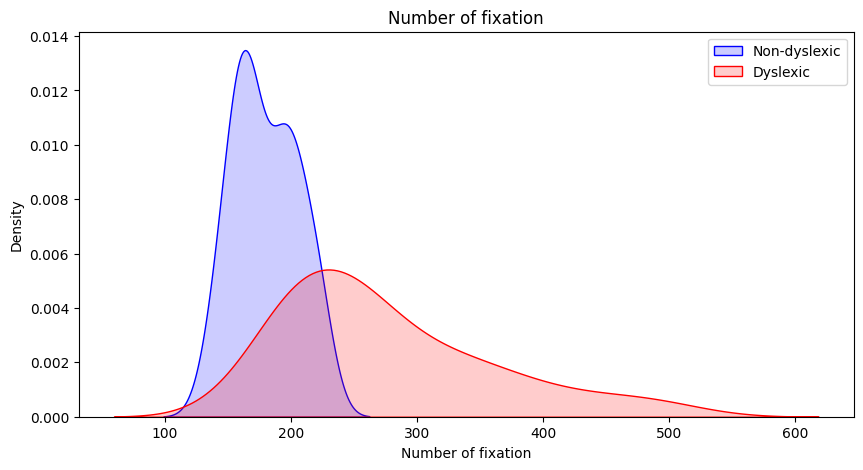

In [371]:
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.title('Number of fixation')

# KDE plot for non-dyslexic group
sns.kdeplot(all_data[:,8][all_data[:,11] == 0], fill=True, label='Non-dyslexic', color='blue', alpha=0.2)

# KDE plot for dyslexic group
sns.kdeplot(all_data[:,8][all_data[:,11] == 1], fill=True, label='Dyslexic', color='red', alpha=0.2)

plt.xlabel('Number of fixation')
plt.ylabel('Density')
plt.legend()
plt.show()

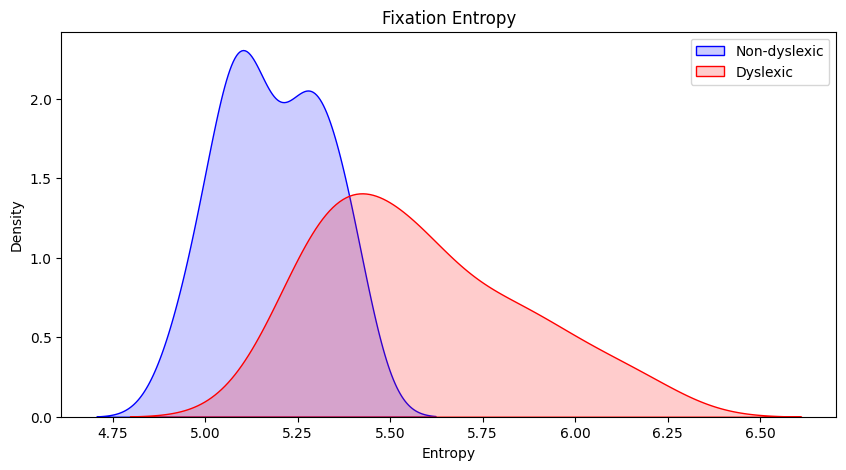

In [372]:
plt.figure(figsize=(10, 5))
plt.title('Fixation Entropy')

# KDE plot for non-dyslexic group
sns.kdeplot(all_data[:,10][all_data[:,11] == 0], fill=True, label='Non-dyslexic', color='blue', alpha=0.2)

# KDE plot for dyslexic group
sns.kdeplot(all_data[:,10][all_data[:,11] == 1], fill=True, label='Dyslexic', color='red', alpha=0.2)

plt.xlabel('Entropy')
plt.ylabel('Density')
plt.legend()
plt.show()

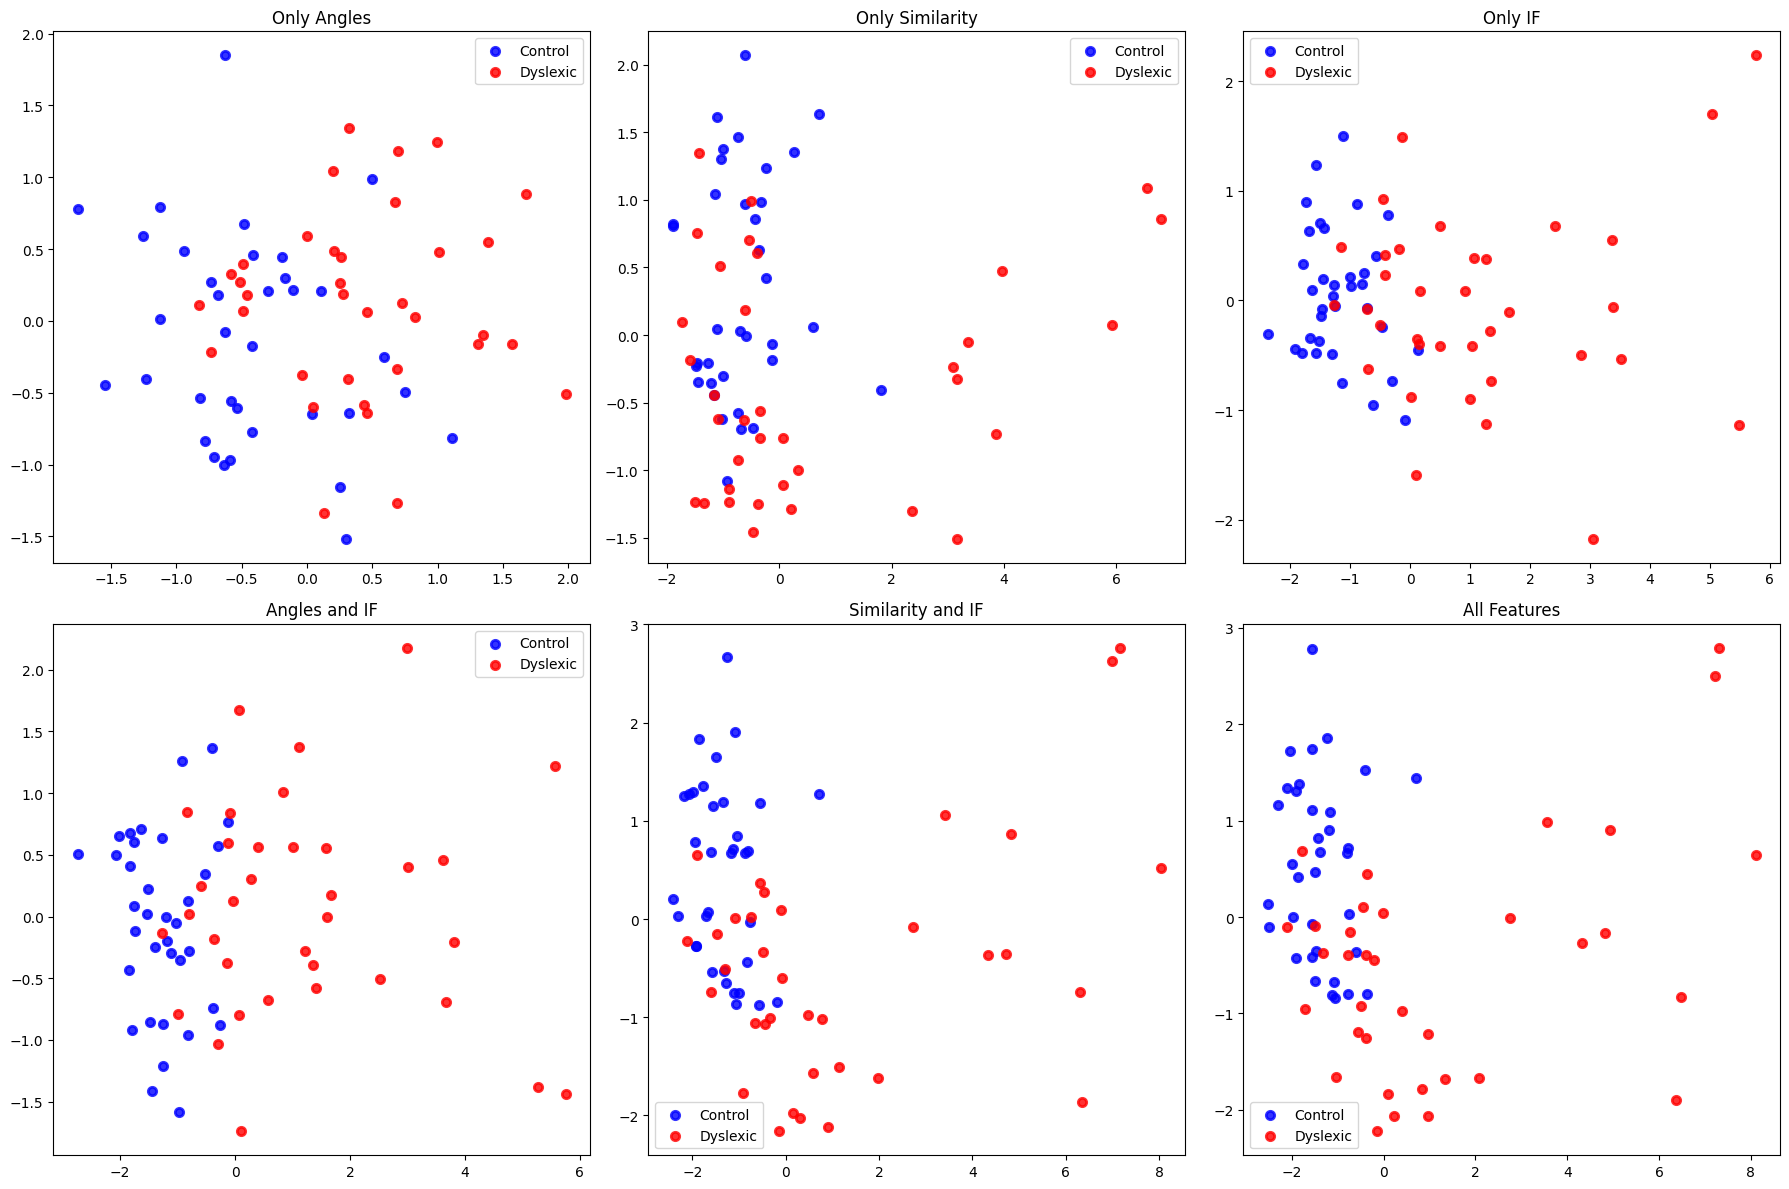

In [373]:
# use pca to reduce the dimensionality of the data and plot the data in 2D
from sklearn.decomposition import PCA
import sklearn.preprocessing
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X = all_data[:, :-1]
y = all_data[:, -1]

X_only_angles = X[:, [0, 1]]
X_angles_and_IF = X[:, [0, 1, 6, 7, 8, 9, 10]]
X_only_sim = X[:, [2, 3, 4, 5]]
X_sim_and_IF = X[:, [2, 3, 4, 5, 6, 7, 8, 9, 10]]
X_only_IF = X[:, [6, 7, 8, 9, 10]]
X_all = X

# color map for the labels
colors = ['blue', 'red']

X_r = pca.fit_transform(X)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

X_variants = [
    (X_only_angles, 'Only Angles'),
    (X_only_sim, 'Only Similarity'),
    (X_only_IF, 'Only IF'),
    (X_angles_and_IF, 'Angles and IF'),
    (X_sim_and_IF, 'Similarity and IF'),
    (X_all, 'All Features')
]

for ax, (X_variant, title) in zip(axes.flatten(), X_variants):
    scaler = sklearn.preprocessing.RobustScaler()
    X_variant = scaler.fit_transform(X_variant)
    X_r = pca.fit_transform(X_variant)
    for color, i, target_name in zip(colors, [0, 1], ['Control', 'Dyslexic']):
        ax.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=2, label=target_name)
    ax.set_title(title)
    ax.legend(loc='best', shadow=False, scatterpoints=1)

plt.tight_layout()
plt.show()

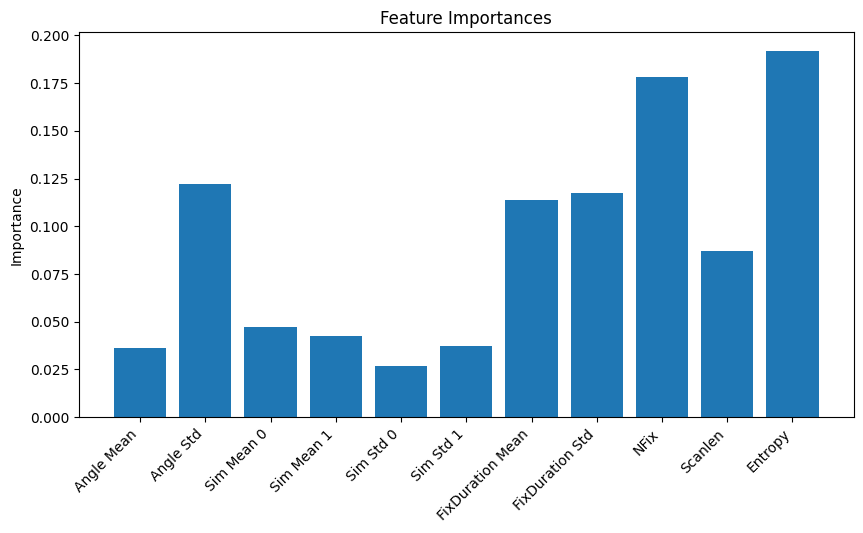

In [374]:
# show barchart with the 11 features and their importance
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=1000, random_state=0)

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Plot the feature importances
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(['Angle Mean', 'Angle Std', 'Sim Mean 0', 'Sim Mean 1', 'Sim Std 0', 'Sim Std 1', 'FixDuration Mean', 'FixDuration Std', 'NFix', 'Scanlen', 'Entropy'], rotation=45, ha='right')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
plt.show()

---

## Classification with machine learning

In [49]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=1, nVer=1, InferS=False)

In [12]:
from scipy.stats import entropy

def caluclate_entropy_fixation(subj,stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = 1680
    sizeY = 1050
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Initialize accuracy and confusion matrix
accuracy = []
conf_matrix = np.zeros((2, 2))

# Total subjects and labels
tot_subj = DyslexiaDat.ns
labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

Angles = [saccade.Angle() for ns in range(tot_subj) for saccade in DyslexiaDat.GetSaccades()[ns][1]]

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    train_subj = train_index
    test_subj = test_index

    # Train set
    # SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(train_subj), method='Kuiper', nosubj=list(test_subj))
    # SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(train_subj), method='peak180', nosubj=list(test_subj))
    # SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(train_subj), method='peak180', match=True, nosubj=list(test_subj))
    SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(train_subj), Thr=10, nosubj=list(test_subj))
    features_train = np.array([[
                                np.mean(Angles[ns]),
                                np.std(Angles[ns]),
                                np.mean(SimVals[sub][0]),
                                np.mean(SimVals[sub][1]),
                                np.std(SimVals[sub][0]),
                                np.std(SimVals[sub][1]),
                                DyslexiaDat.len_scanpath[ns][1],
                                DyslexiaDat.nfixations[ns][1],
                                np.mean(DyslexiaDat.GetDurations(DyslexiaDat.subjects[ns], DyslexiaDat.stimuli[1])),
                                np.std(DyslexiaDat.GetDurations(DyslexiaDat.subjects[ns], DyslexiaDat.stimuli[1])),
                                caluclate_entropy_fixation(ns, 1)]
                                for sub, ns in enumerate(train_subj)])
    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Test set
    # SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(test_subj), method='Kuiper') # accuracy: 0.8286
    # SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(test_subj), method='peak180') # accuracy: 0.81429
    # SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(test_subj), method='peak180', match=True) # accuracy: 0.8429
    SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(test_subj), Thr=10) # accuracy: 0.8571
    features_test = np.array([[
                               np.mean(Angles[ns]),
                               np.std(Angles[ns]),
                               np.mean(SimVals[sub][0]),
                               np.mean(SimVals[sub][1]),
                               np.std(SimVals[sub][0]),
                               np.std(SimVals[sub][1]),
                               DyslexiaDat.len_scanpath[ns][1], 
                               DyslexiaDat.nfixations[ns][1],
                               np.mean(DyslexiaDat.GetDurations(DyslexiaDat.subjects[ns], DyslexiaDat.stimuli[1])),
                               np.std(DyslexiaDat.GetDurations(DyslexiaDat.subjects[ns], DyslexiaDat.stimuli[1])),
                               caluclate_entropy_fixation(ns, 1)]
                               for sub, ns in enumerate(test_subj)])
    labels_test = np.array([WhichCN[sub] for sub in test_subj])



    # model = KNeighborsClassifier(n_neighbors=5, n_jobs=5) # top socre 0.7286

    # Random Forest Classifier
    model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=5)
    model.fit(features_train, labels_train)

    # Predict class probabilities
    probabilities = model.predict_proba(features_test)[:, 1]

    # Class predictions
    predictions = model.predict(features_test)

    # Evaluate performance
    accuracy.append(accuracy_score(labels_test, predictions))
    conf_matrix += confusion_matrix(labels_test, predictions)

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Average accuracy: 0.8571428571428571
Total confusion matrix:
[[31.  4.]
 [ 6. 29.]]
False positives: 4.0
False negatives: 6.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Initialize accuracy and confusion matrix
accuracy = []
conf_matrix = np.zeros((2, 2))

# Total subjects and labels
tot_subj = DyslexiaDat.ns
labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

Angles = [saccade.Angle() for ns in range(tot_subj) for saccade in DyslexiaDat.GetSaccades()[ns][1]]

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    train_subj = train_index
    test_subj = test_index

    # Train set
    features_train = np.array([[
                                np.mean(Angles[ns]),
                                np.std(Angles[ns]),
                                DyslexiaDat.len_scanpath[ns][1],
                                DyslexiaDat.nfixations[ns][1],
                                np.mean(DyslexiaDat.GetDurations(DyslexiaDat.subjects[ns], DyslexiaDat.stimuli[1])),
                                np.std(DyslexiaDat.GetDurations(DyslexiaDat.subjects[ns], DyslexiaDat.stimuli[1])),
                                caluclate_entropy_fixation(ns, 1)]
                                for sub, ns in enumerate(train_subj)])
    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Test set
    features_test = np.array([[
                               np.mean(Angles[ns]),
                               np.std(Angles[ns]),
                               DyslexiaDat.len_scanpath[ns][1], 
                               DyslexiaDat.nfixations[ns][1],
                               np.mean(DyslexiaDat.GetDurations(DyslexiaDat.subjects[ns], DyslexiaDat.stimuli[1])),
                               np.std(DyslexiaDat.GetDurations(DyslexiaDat.subjects[ns], DyslexiaDat.stimuli[1])),
                               caluclate_entropy_fixation(ns, 1)]
                               for sub, ns in enumerate(test_subj)])
    labels_test = np.array([WhichCN[sub] for sub in test_subj])



    # model = KNeighborsClassifier(n_neighbors=1, n_jobs=5) # top socre 0.7285714285714286

    # Random Forest Classifier
    # model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=5) 0.8429
    model.fit(features_train, labels_train)

    # Predict class probabilities
    probabilities = model.predict_proba(features_test)[:, 1]

    # Class predictions
    predictions = model.predict(features_test)

    # Evaluate performance
    accuracy.append(accuracy_score(labels_test, predictions))
    conf_matrix += confusion_matrix(labels_test, predictions)

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Comparing the two code we can see how information about the similarity with the group improve the classification accuracy using the Threshold method and Random Forest Classifier.

---

In [250]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=10, stim=1, nVer=9, InferS=False)

In [251]:
def vectorize(ROIVals):
    vector_roi = np.zeros((len(ROIVals), 360))
    for subj in range(len(ROIVals)):
        for group in range(2):
            for vertical in range(9):
                for horizontal in range(10):
                    mean_val = np.mean(ROIVals[subj][group][vertical][horizontal])
                    std_val = np.std(ROIVals[subj][group][vertical][horizontal])
                    if np.isnan(mean_val):
                        mean_val = 0
                    if np.isnan(std_val):
                        std_val = 0
                    vector_roi[subj][group*180+vertical*10+horizontal] = mean_val
                    vector_roi[subj][group*180+vertical*10+horizontal+1] = std_val
    return vector_roi

In [253]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(360, 180)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(180, 90)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(90, 45)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(45, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.sigmoid(self.fc4(x))
        return x

# Initialize accuracy and confusion matrix
accuracy = []
conf_matrix = np.zeros((2, 2))

tot_subj = DyslexiaDat.ns
labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    train_subj = train_index
    test_subj = test_index

    SimVals,ROIVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(train_subj), Thr=5, SingleROI=True, nosubj=list(test_subj))
    vector_roi = vectorize(ROIVals)
    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32)
    y_train = torch.tensor(labels_train, dtype=torch.float32).view(-1, 1)

    
    SimVals,ROIVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, subjects=list(test_subj), Thr=5, SingleROI=True)
    vector_roi = vectorize(ROIVals)
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32)
    y_test = torch.tensor(labels_test, dtype=torch.float32).view(-1, 1)

    # Initialize the model, loss function, and optimizer
    model = NN()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    model.train()
    for epoch in range(500):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    if loss < best_loss:
        # save chekpoint
        checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
        best_loss = loss

    # Load the best model
    model = checkpoint['model']
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = (outputs > 0.5).float()
        accuracy.append(accuracy_score(y_test, predictions))
        conf_matrix += confusion_matrix(y_test, predictions)

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Average accuracy: 0.6142857142857143
Total confusion matrix:
[[21. 14.]
 [13. 22.]]
False positives: 14.0
False negatives: 13.0


---

In [305]:
def get_entropy(subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = 1680
    sizeY = 1050
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [307]:
def regressionfeature(saccades):
    # calculate the number of regression (saccades with angles > 90 and < 270)
    nreg = 0
    nprog = 0
    for saccade in saccades:
        if saccade.Angle() > 90 and saccade.Angle() < 270:
            nreg += 1
        else:
            nprog += 1
    return nreg, nprog


In [314]:
from sklearn.preprocessing import StandardScaler

def vectorize(SimAndFeatureVals):
    saccades = DyslexiaDat.GetSaccades()
    vector_roi = np.zeros((len(SimAndFeatureVals), 809))
    for subj in range(len(SimAndFeatureVals)):
        for v in range(10):
            for h in range(10):
                # SimAndFeatureVals[subject][vertical][horizontal] contains 8 features values
                vector_roi[subj][v*80+h*8 : v*80+h*8+8] = np.array(SimAndFeatureVals[subj][v][h])
        # add general features
        vector_roi[subj][801] = DyslexiaDat.len_scanpath[subj][1]
        vector_roi[subj][802] = DyslexiaDat.nfixations[subj][1]
        vector_roi[subj][803] = np.mean(DyslexiaDat.GetDurations(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[1]))
        vector_roi[subj][804] = np.std(DyslexiaDat.GetDurations(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[1]))
        vector_roi[subj][805] = np.sum(DyslexiaDat.GetDurations(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[1]))
        vector_roi[subj][806] = get_entropy(subj, 1)
        reg, prog = regressionfeature(saccades[subj][1])
        vector_roi[subj][807] = reg
        vector_roi[subj][808] = reg / prog
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [321]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(809, 404)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(404, 202)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(202, 101)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(101, 1)
        self.sigmoid = nn.Sigmoid()
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.sigmoid(self.fc4(x))
        return x

# Initialize accuracy and confusion matrix
accuracy = []
conf_matrix = np.zeros((2, 2))

tot_subj = DyslexiaDat.ns
labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    train_subj = train_index
    test_subj = test_index

    # Train set
    with io.capture_output() as _:
        SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(1, WhichCN, subjects=list(train_subj), nHor=10, nVer=10, inferS=False, Thr=5, normalize='add', method='default', nosubj=list(test_subj))
    vector_roi = vectorize(SimAndFeatureVals)
    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.float32).view(-1, 1).to(device)

    # Test set
    with io.capture_output() as _:
        SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(1, WhichCN, subjects=list(test_subj), nHor=10, nVer=10, inferS=False, Thr=5, normalize='add', method='default')
    vector_roi = vectorize(SimAndFeatureVals)
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.float32).view(-1, 1).to(device)

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = (outputs > 0.5).float()
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.7270056009292603
Epoch 5 loss: 0.08198084682226181
Epoch 10 loss: 0.00011895332863787189
Epoch 15 loss: 5.367469566408545e-05
Epoch 0 loss: 0.7501307129859924
Epoch 5 loss: 0.18592754006385803
Epoch 10 loss: 0.0012483341852203012
Epoch 15 loss: 1.0137381423191982e-06
Epoch 0 loss: 0.8136386275291443
Epoch 5 loss: 0.10899368673563004
Epoch 10 loss: 0.0007359377923421562
Epoch 15 loss: 6.222564115887508e-05
Epoch 0 loss: 0.8792322874069214
Epoch 5 loss: 0.07247344404459
Epoch 10 loss: 0.00021202921925578266
Epoch 15 loss: 0.00022302355500869453
Epoch 0 loss: 0.6979593634605408
Epoch 5 loss: 0.0638841763138771
Epoch 10 loss: 0.08589205145835876
Epoch 15 loss: 1.45639432957978e-07
Average accuracy: 0.7714285714285715
Standard deviation: 0.11428571428571427
Total confusion matrix:
[[28.  7.]
 [ 9. 26.]]
False positives: 7.0
False negatives: 9.0


---

Another States of the art approach transform the fixation in a continuous signal and calculate the magnitude of the signal in the time domain that it will be used as input for a convolutional neural network.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct
from scipy.fft import fft

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [16]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft

def get_data(stim, split_size, batch_size, random_state, addin_features=False):
    # Splitting by participants
    subj = FixData['sid'].unique()
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    Data=FixData[FixData['stimfile']== stim]
    train_data = Data[Data['sid'].isin(train_participants)]
    test_data = Data[Data['sid'].isin(test_participants)]

    # Feature selection for each participant
    def extract_features(data):
        features, labels, handcrafted = [], [], []
        for subj in data['sid'].unique():
            subj_data = data[data['sid'] == subj][['orig_fix_x', 'orig_fix_y']].values
            features.append(subj_data)
            labels.append(data[data['sid'] == subj]['class_id'].iloc[0])

            # Compute handcrafted features
            x, y = subj_data[:, 0], subj_data[:, 1]
            H, _, _ = np.histogram2d(x, y, bins=(1680, 1050))
            H = H / H.sum()
            ent = entropy(H.flatten())

            # Calculate scanpath length
            scanlen = np.sum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
            nfix = len(subj_data)

            handcrafted.append([ent, scanlen, nfix])  # Add handcrafted features

        return features, labels, handcrafted

    train_features, train_labels, train_handcrafted = extract_features(train_data)
    test_features, test_labels, test_handcrafted = extract_features(test_data)

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(pad_size):
                cn = np.sqrt(2 / pad_size) if k != 0 else np.sqrt(1 / pad_size)
                dct_result[k, n] = cn * np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * pad_size)))
        return dct_result
        
    # Step 3: Perform IDCT Type III
    def perform_idct(data):
        idct_result = np.zeros((data.shape[0], data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(data.shape[0]):
                idct_result[k, n] = np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * data.shape[0])) * (np.sqrt(2 / data.shape[0]) if k != 0 else np.sqrt(1 / data.shape[0])))
        return idct_result

    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio

    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0)

    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[:magnitude.shape[0]//2]
        return final_data

    pad = max([len(data) for data in train_features + test_features])
    # Apply the pipeline to all participants
    train_features = [data_output(data, pad) for data in train_features]
    test_features = [data_output(data, pad) for data in test_features]

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

    if addin_features:
        train_handcrafted = torch.tensor(train_handcrafted, dtype=torch.float32)
        test_handcrafted = torch.tensor(test_handcrafted, dtype=torch.float32)

        train_dataset = TensorDataset(train_features, train_handcrafted, train_labels)
        test_dataset = TensorDataset(test_features, test_handcrafted, test_labels)

    else:
        train_dataset = TensorDataset(train_features, train_labels)
        test_dataset = TensorDataset(test_features, test_labels)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader, train_features, train_labels, test_features, test_labels

In [118]:
class CNN(nn.Module):
    def __init__(self, num_classes, input_channels=2):
        super(CNN, self).__init__()
        # Three Conv1d layers with kernel_size=3, stride=1, padding=1
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # MaxPool1d layer (kernel_size=2, stride=2)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # Activation function
        self.relu = nn.ReLU()
        
        # Fully connected layer
        final_seq_len = 248 // 2  # integer division
        # The flattened feature dimension will be: 32 channels * final_seq_len
        self.fc = nn.Linear(32 * final_seq_len, num_classes)

    def forward(self, x):
        # Input x shape: [batch, sequence_length, channels]
        # Transpose to [batch, channels, sequence_length] for Conv1d
        x = x.transpose(1, 2)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        # Flatten the features for the fully connected layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

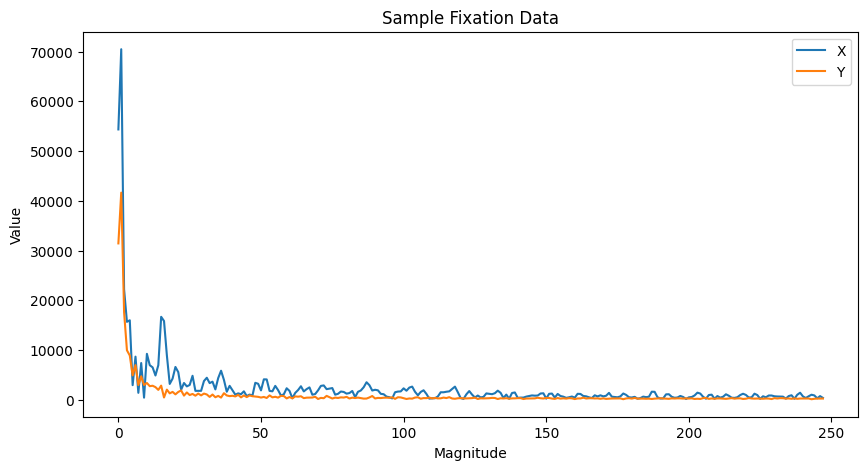

In [86]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable verbose mode
verbose = True
stimulus = DyslexiaDat.stimuli[1]

# Load data
train_loader, test_loader, train_features, train_labels, test_features, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=32, random_state=42, addin_features=False
)

# train_features = torch.Size([63, 248, 2]) 63 subjects, 248 magnitudes values, 2 channels (x, y)
plt.figure(figsize=(10, 5))
plt.plot(train_features[0, :, 0], label='X')
plt.plot(train_features[0, :, 1], label='Y')
plt.xlabel('Magnitude')
plt.ylabel('Value')
plt.title('Sample Fixation Data')
plt.legend()
plt.show()


In [119]:
# ---------------------
# Setup training
# ---------------------

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Determine device to use (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Determine number of classes from training labels.
# Here we assume train_labels is a tensor containing integer class labels.
num_classes = len(torch.unique(train_labels))
model = CNN(num_classes=num_classes, input_channels=2).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---------------------
# Training loop
# ---------------------
num_epochs = 100  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for features, labels in train_loader:
        # Move data to device
        features, labels = features.to(device), labels.to(device)
        labels = labels.squeeze().long()
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * features.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    # print every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# ---------------------
# Evaluation
# ---------------------
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        # Move data to device
        features, labels = features.to(device), labels.to(device)
        labels = labels.squeeze()
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Epoch 10/100, Loss: 9.5392
Epoch 20/100, Loss: 0.7270
Epoch 30/100, Loss: 0.0000
Epoch 40/100, Loss: 0.0000
Epoch 50/100, Loss: 0.0000
Epoch 60/100, Loss: 0.0000
Epoch 70/100, Loss: 0.0000
Epoch 80/100, Loss: 0.0000
Epoch 90/100, Loss: 0.0000
Epoch 100/100, Loss: 0.0000
Test Accuracy: 85.71%
